In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install "pymongo[srv]"

In [3]:
!pip install dnspython

In [4]:
import pymongo
pymongo.MongoClient()


MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [5]:
type( pymongo.MongoClient() )

pymongo.mongo_client.MongoClient

In [6]:
from pymongo import MongoClient

client = MongoClient(
    host = 'mongodb+srv://akshayasrinivasan.vjxjg.mongodb.net/Basketball:27017', # <-- IP and port go here
    serverSelectionTimeoutMS = 3000, # 3 second timeout
    username="Akshaya",
    password="****",
)

In [7]:
server_info = client.server_info()
print (server_info)

{'version': '4.4.10', 'gitVersion': '58971da1ef93435a9f62bf4708a81713def6e88c', 'modules': ['enterprise'], 'allocator': 'tcmalloc', 'javascriptEngine': 'mozjs', 'sysInfo': 'deprecated', 'versionArray': [4, 4, 10, 0], 'openssl': {'running': 'OpenSSL 1.0.1e-fips 11 Feb 2013', 'compiled': 'OpenSSL 1.0.1e-fips 11 Feb 2013'}, 'buildEnvironment': {'distmod': 'rhel70', 'distarch': 'x86_64', 'cc': '/opt/mongodbtoolchain/v3/bin/gcc: gcc (GCC) 8.5.0', 'ccflags': '-fno-omit-frame-pointer -fno-strict-aliasing -fasynchronous-unwind-tables -ggdb -pthread -Wall -Wsign-compare -Wno-unknown-pragmas -Winvalid-pch -Werror -O2 -Wno-unused-local-typedefs -Wno-unused-function -Wno-deprecated-declarations -Wno-unused-const-variable -Wno-unused-but-set-variable -Wno-missing-braces -fstack-protector-strong -fno-builtin-memcmp', 'cxx': '/opt/mongodbtoolchain/v3/bin/g++: g++ (GCC) 8.5.0', 'cxxflags': '-Woverloaded-virtual -Wno-maybe-uninitialized -fsized-deallocation -std=c++17', 'linkflags': '-pthread -Wl,-z,no

In [8]:
print ("\nserver info keys:", server_info.keys())


server info keys: dict_keys(['version', 'gitVersion', 'modules', 'allocator', 'javascriptEngine', 'sysInfo', 'versionArray', 'openssl', 'buildEnvironment', 'bits', 'debug', 'maxBsonObjectSize', 'storageEngines', 'ok', '$clusterTime', 'operationTime'])


In [9]:
print ("\nserver version:", server_info["version"])


server version: 4.4.10


In [10]:
# connect to the mongoclient
# get the database
database = client['Basketball']

In [217]:
Basketball_Analysis = database.get_collection("Basketball_Analysis")
Game_Analysis = database.get_collection("Game_Analysis")
Team_Analysis = database.get_collection("Team_Analysis")
Player_Analysis = database.get_collection("Player_Analysis")

In [12]:
x = Game_Analysis.aggregate([{ '$group':{ '_id' : '$LOCATION', 'sum' : { '$sum': "$WIN_COUNT" } }}])
for i in x:
    print(i)

{'_id': 'HOME', 'sum': 28457}
{'_id': 'AWAY', 'sum': 18330}


In [13]:
x = Game_Analysis.find({'SEASON' : {'$gte': 2000}})
for i in x:
    print(i)

{'_id': ObjectId('6186ed01c5404e278a49c70b'), 'TEAM_ID': 1610612737, 'SEASON': 2020, 'LOCATION': 'AWAY', 'WIN_COUNT': 16, 'AVERAGE_2_POINT_GOAL_EFFICIENCY': 0.46, 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.36, 'AVERAGE_2_POINT_GOAL_PERCENTAGE': 0.36, 'AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.11, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.81, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.17, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.24, 'AVERAGE_ASSISTS': 23.14, 'AVERAGE_PAINT_POINTS': 0.43, 'AVERAGE_2ND_CHANCE_POINTS': 0.14, 'DEFENSIVE_REBOUND_PERCENTAGE': 0.76, 'AVERAGE_NUMBER_OF_STEALS': 7.11, 'AVERAGE_NUMBER_OF_BLOCKS': 4.67, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.15, 'AVERGAE_FOULS': 19.36, 'AVERAGE_TURNOVER': 13.03, 'GAME_COUNT': 36, 'TOTAL_WIN_COUNT': 41, 'TOTAL_AVERAGE_2_POINT_GOAL_EFFICIENCY': 0.47, 'TOTAL_AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.37, 'TOTAL_AVERAGE_2_POINT_GOAL_PERCENTAGE': 0.36, 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.11, 'TOTAL_FREE_THROUGH_GOAL_EFFICIENCY': 0.81, 'TOTAL_FREE_THROUGH_GOAL_PERC

{'_id': ObjectId('6186ed01c5404e278a49c82f'), 'TEAM_ID': 1610612739, 'SEASON': 2012, 'LOCATION': 'HOME', 'WIN_COUNT': 13, 'AVERAGE_2_POINT_GOAL_EFFICIENCY': 0.44, 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.34, 'AVERAGE_2_POINT_GOAL_PERCENTAGE': 0.38, 'AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.07, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.76, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.18, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.3, 'AVERAGE_ASSISTS': 22.48, 'AVERAGE_PAINT_POINTS': 0.41, 'AVERAGE_2ND_CHANCE_POINTS': 0.16, 'DEFENSIVE_REBOUND_PERCENTAGE': 0.7, 'AVERAGE_NUMBER_OF_STEALS': 7.5, 'AVERAGE_NUMBER_OF_BLOCKS': 4.73, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.16, 'AVERGAE_FOULS': 19.8, 'AVERAGE_TURNOVER': 14.0, 'GAME_COUNT': 40, 'TOTAL_WIN_COUNT': 23, 'TOTAL_AVERAGE_2_POINT_GOAL_EFFICIENCY': 0.44, 'TOTAL_AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.34, 'TOTAL_AVERAGE_2_POINT_GOAL_PERCENTAGE': 0.38, 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.07, 'TOTAL_FREE_THROUGH_GOAL_EFFICIENCY': 0.76, 'TOTAL_FREE_THROUGH_GOAL_PERCENTAG

1.  The winning percentage of home team and away team over the years
SELECT 
	LOCATION
	,TEAM_NAME
	,SUM(WIN_COUNT)*100/SUM(GAME_COUNT) AS `WIN %`
FROM 
	game_analysis
WHERE 
	SEASON >= 2000
GROUP BY 1,2;


In [14]:
x1 = Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$LOCATION', '$TEAM_NAME'],
      'WIN_COUNT': { '$sum': '$WIN_COUNT' },
      'GAME_COUNT': { '$sum': '$GAME_COUNT' }
    }
  },
  {
    '$set': {
      'WIN_PERCENTAGE': {'$multiply':[{'$divide': ['$WIN_COUNT', '$GAME_COUNT']}, 100] }
    }
  }

]
)
CNT = 0
for i in x1:
    CNT+= 1
    print(i)
print(CNT)

{'_id': ['HOME', 'Detroit Pistons'], 'WIN_COUNT': 454, 'GAME_COUNT': 793, 'WIN_PERCENTAGE': 57.250945775535946}
{'_id': ['HOME', 'Milwaukee Bucks'], 'WIN_COUNT': 468, 'GAME_COUNT': 795, 'WIN_PERCENTAGE': 58.867924528301884}
{'_id': ['AWAY', 'Memphis Grizzlies'], 'WIN_COUNT': 303, 'GAME_COUNT': 802, 'WIN_PERCENTAGE': 37.78054862842893}
{'_id': ['HOME', 'Cleveland Cavaliers'], 'WIN_COUNT': 454, 'GAME_COUNT': 795, 'WIN_PERCENTAGE': 57.10691823899371}
{'_id': ['AWAY', 'Milwaukee Bucks'], 'WIN_COUNT': 325, 'GAME_COUNT': 845, 'WIN_PERCENTAGE': 38.46153846153847}
{'_id': ['AWAY', 'Miami Heat'], 'WIN_COUNT': 391, 'GAME_COUNT': 843, 'WIN_PERCENTAGE': 46.38196915776987}
{'_id': ['AWAY', 'Boston Celtics'], 'WIN_COUNT': 409, 'GAME_COUNT': 843, 'WIN_PERCENTAGE': 48.517200474495844}
{'_id': ['AWAY', 'New York Knicks'], 'WIN_COUNT': 273, 'GAME_COUNT': 840, 'WIN_PERCENTAGE': 32.5}
{'_id': ['HOME', 'Brooklyn Nets'], 'WIN_COUNT': 435, 'GAME_COUNT': 817, 'WIN_PERCENTAGE': 53.24357405140759}
{'_id': ['HOM

   WIN_COUNT  GAME_COUNT  WIN_PERCENTAGE LOCATION TEAM_SLUG
0        314         844           37.20     AWAY       ORL
1        205         677           30.28     AWAY       CHA
2        343         842           40.74     AWAY       LAC
3        325         844           38.51     AWAY       PHI
4        360         840           42.86     AWAY       PHX


<AxesSubplot:xlabel='TEAM_SLUG', ylabel='WIN_PERCENTAGE'>

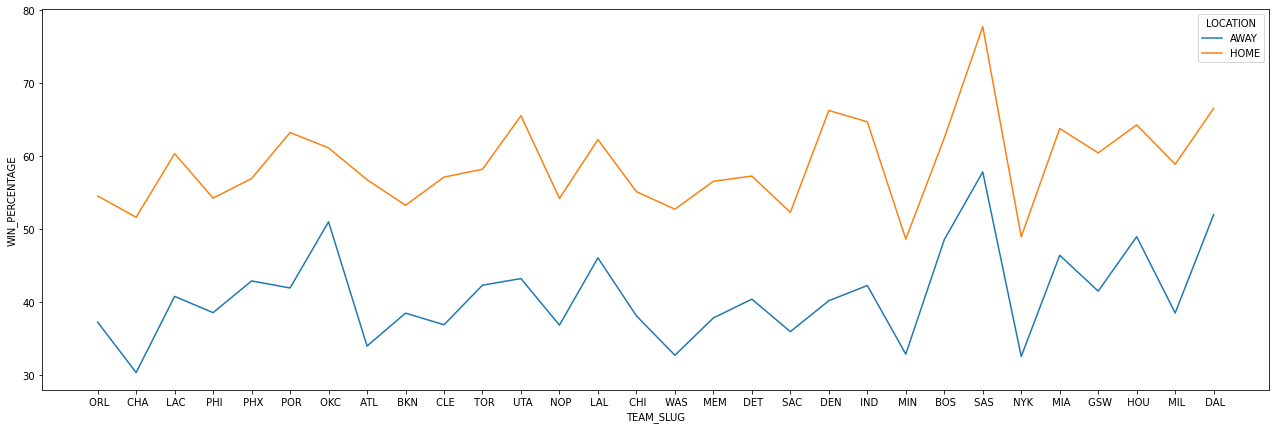

In [51]:
df1 = pd.DataFrame(list(Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$LOCATION', '$TEAM_SLUG'],
      'WIN_COUNT': { '$sum': '$WIN_COUNT' },
      'GAME_COUNT': { '$sum': '$GAME_COUNT' }
    }
  },
  {
    '$set': {
      'WIN_PERCENTAGE': {'$multiply':[{'$divide': ['$WIN_COUNT', '$GAME_COUNT']}, 100] }
    }
  }

]
)))
pd.set_option('precision', 2)
df1['_id'] = df1['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df1['_id'] = df1['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df1['_id'] = df1['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df1[['LOCATION','TEAM_SLUG']] = df1['_id'].str.split(',', expand=True)
df1.drop(['_id'],axis=1,inplace=True)
print(df1.head())
plt.figure(figsize=(22, 7))
sns.lineplot(data=df1, x="TEAM_SLUG", y="WIN_PERCENTAGE", hue = 'LOCATION')

2. 
-- Offensive and defensive metrics 
-- Defense Metrics
SELECT 
	`game_analysis`.`LOCATION` AS `LOCATION`,
	`game_analysis`.`TEAM_SLUG` AS `TEAM_SLUG`,
	AVG(`game_analysis`.`AVERAGE_NUMBER_OF_BLOCKS`) AS `AVERAGE_NUMBER_OF_BLOCKS`,
	AVG(`game_analysis`.`AVERAGE_NUMBER_OF_STEALS`) AS `AVERAGE_NUMBER_OF_STEALS`,
	AVG(`game_analysis`.`AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE`) AS `AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE`,
	AVG(`game_analysis`.`DEFENSIVE_REBOUND_PERCENTAGE`) AS `DEFENSIVE_REBOUND_PERCENTAGE`
FROM 
	`game_analysis`
WHERE (`game_analysis`.`SEASON` >= '2000')
GROUP BY 1,2;

In [16]:
x2 = Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$LOCATION', '$TEAM_SLUG'],
      'AVERAGE_NUMBER_OF_BLOCKS': { '$avg': '$AVERAGE_NUMBER_OF_BLOCKS' },
      'AVERAGE_NUMBER_OF_STEALS': { '$avg': '$AVERAGE_NUMBER_OF_STEALS' },
      'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': { '$avg': '$AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE' },
      'DEFENSIVE_REBOUND_PERCENTAGE': { '$avg': '$DEFENSIVE_REBOUND_PERCENTAGE' }
    }
  }
]
)
CNT = 0
for i in x2:
    CNT+= 1
    print(i)
print(CNT)

{'_id': ['HOME', 'OKC'], 'AVERAGE_NUMBER_OF_BLOCKS': 5.397619047619047, 'AVERAGE_NUMBER_OF_STEALS': 7.935714285714286, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.15904761904761905, 'DEFENSIVE_REBOUND_PERCENTAGE': 0.7371428571428572}
{'_id': ['HOME', 'CHA'], 'AVERAGE_NUMBER_OF_BLOCKS': 5.73, 'AVERAGE_NUMBER_OF_STEALS': 7.235263157894737, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.1531578947368421, 'DEFENSIVE_REBOUND_PERCENTAGE': 0.7478947368421053}
{'_id': ['HOME', 'MEM'], 'AVERAGE_NUMBER_OF_BLOCKS': 5.588095238095238, 'AVERAGE_NUMBER_OF_STEALS': 8.05952380952381, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.16285714285714287, 'DEFENSIVE_REBOUND_PERCENTAGE': 0.7338095238095238}
{'_id': ['HOME', 'DET'], 'AVERAGE_NUMBER_OF_BLOCKS': 5.354761904761905, 'AVERAGE_NUMBER_OF_STEALS': 7.173333333333333, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.15333333333333335, 'DEFENSIVE_REBOUND_PERCENTAGE': 0.7304761904761905}
{'_id': ['HOME', 'LAL'], 'AVERAGE_NUMBER_OF_BLOCKS': 5.39, 'AVERAGE_NUM

   AVERAGE_NUMBER_OF_BLOCKS  AVERAGE_NUMBER_OF_STEALS  \
0                      5.09                      7.53   
1                      4.97                      6.90   
2                      4.03                      7.24   
3                      4.74                      7.68   
4                      4.49                      7.07   

   AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE  DEFENSIVE_REBOUND_PERCENTAGE  \
0                                      0.15                          0.75   
1                                      0.17                          0.73   
2                                      0.18                          0.73   
3                                      0.17                          0.74   
4                                      0.17                          0.77   

  LOCATION TEAM_SLUG  
0     HOME       TOR  
1     AWAY       POR  
2     AWAY       CLE  
3     HOME       ATL  
4     AWAY       BKN  


<AxesSubplot:xlabel='TEAM_SLUG', ylabel='DEFENSIVE_REBOUND_PERCENTAGE'>

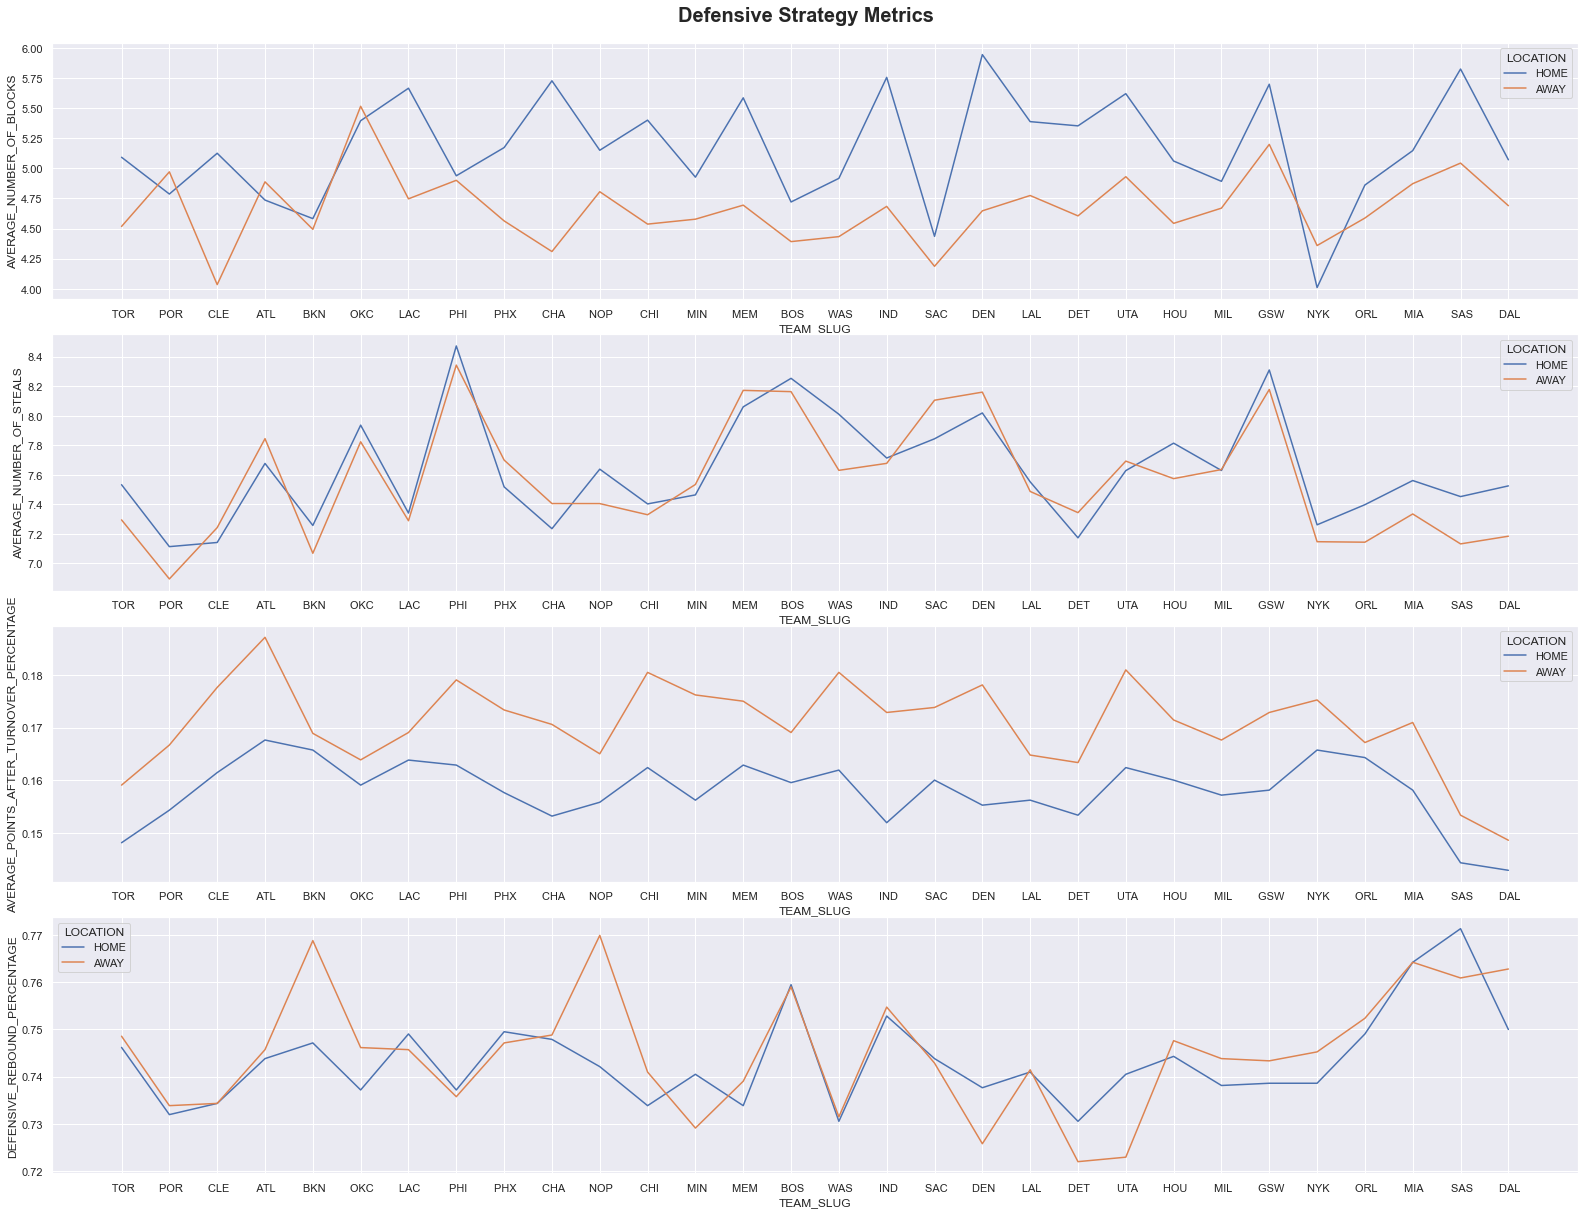

In [84]:
df2 = pd.DataFrame(list(Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$LOCATION', '$TEAM_SLUG'],
      'AVERAGE_NUMBER_OF_BLOCKS': { '$avg': '$AVERAGE_NUMBER_OF_BLOCKS' },
      'AVERAGE_NUMBER_OF_STEALS': { '$avg': '$AVERAGE_NUMBER_OF_STEALS' },
      'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': { '$avg': '$AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE' },
      'DEFENSIVE_REBOUND_PERCENTAGE': { '$avg': '$DEFENSIVE_REBOUND_PERCENTAGE' }
    }
  }
]
)))
pd.set_option('precision', 2)
df2['_id'] = df2['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df2['_id'] = df2['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df2['_id'] = df2['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df2[['LOCATION','TEAM_SLUG']] = df2['_id'].str.split(',', expand=True)
df2.drop(['_id'],axis=1,inplace=True)
print(df2.head())
fig, axes = plt.subplots(4, 1, figsize=(22,17), sharey=False, sharex=False)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Defensive Strategy Metrics', fontsize=20, fontweight='bold')
sns.lineplot(ax=axes[0], data=df2, x="TEAM_SLUG", y="AVERAGE_NUMBER_OF_BLOCKS", hue = 'LOCATION')
sns.lineplot(ax=axes[1], data=df2, x="TEAM_SLUG", y="AVERAGE_NUMBER_OF_STEALS", hue = 'LOCATION')
sns.lineplot(ax=axes[2], data=df2, x="TEAM_SLUG", y="AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE", hue = 'LOCATION')
sns.lineplot(ax=axes[3], data=df2, x="TEAM_SLUG", y="DEFENSIVE_REBOUND_PERCENTAGE", hue = 'LOCATION')

3. -- Offense Metrics
SELECT 
	`game_analysis`.`LOCATION` AS `LOCATION`,
	`game_analysis`.`TEAM_SLUG` AS `TEAM_SLUG`,
	AVG(`game_analysis`.`AVERAGE_2ND_CHANCE_POINTS`) AS `AVERAGE_2ND_CHANCE_POINTS`,
	AVG(`game_analysis`.`AVERAGE_ASSISTS`) AS `AVERAGE_ASSISTS`,
	AVG(`game_analysis`.`AVERAGE_PAINT_POINTS`) AS `AVERAGE_PAINT_POINTS`,
	AVG(`game_analysis`.`OFFENSIVE_REBOUND_PERCENTAGE`) AS `OFFENSIVE_REBOUND_PERCENTAGE`
FROM
	`game_analysis`
WHERE (`game_analysis`.`SEASON` >= '2000')
GROUP BY 1,2;


In [18]:
x3 = Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$LOCATION', '$TEAM_SLUG'],
      'AVERAGE_2ND_CHANCE_POINTS': { '$avg': '$AVERAGE_2ND_CHANCE_POINTS' },
      'AVERAGE_ASSISTS': { '$avg': '$AVERAGE_ASSISTS' },
      'AVERAGE_PAINT_POINTS': { '$avg': '$AVERAGE_PAINT_POINTS' },
      'OFFENSIVE_REBOUND_PERCENTAGE': { '$avg': '$OFFENSIVE_REBOUND_PERCENTAGE' }
    }
  }
]
)
CNT = 0
for i in x3:
    CNT+= 1
    print(i)
print(CNT)

{'_id': ['HOME', 'OKC'], 'AVERAGE_2ND_CHANCE_POINTS': 0.13571428571428573, 'AVERAGE_ASSISTS': 21.848095238095237, 'AVERAGE_PAINT_POINTS': 0.429047619047619, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.2628571428571429}
{'_id': ['HOME', 'CHA'], 'AVERAGE_2ND_CHANCE_POINTS': 0.13263157894736843, 'AVERAGE_ASSISTS': 22.76421052631579, 'AVERAGE_PAINT_POINTS': 0.4189473684210526, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.2521052631578947}
{'_id': ['HOME', 'MEM'], 'AVERAGE_2ND_CHANCE_POINTS': 0.13476190476190478, 'AVERAGE_ASSISTS': 21.759999999999998, 'AVERAGE_PAINT_POINTS': 0.4538095238095238, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.2661904761904762}
{'_id': ['HOME', 'DET'], 'AVERAGE_2ND_CHANCE_POINTS': 0.14238095238095239, 'AVERAGE_ASSISTS': 22.224761904761905, 'AVERAGE_PAINT_POINTS': 0.41047619047619044, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.26952380952380955}
{'_id': ['HOME', 'LAL'], 'AVERAGE_2ND_CHANCE_POINTS': 0.13571428571428573, 'AVERAGE_ASSISTS': 23.853809523809524, 'AVERAGE_PAINT_POINTS': 0.4452380952380952, 'O

   AVERAGE_2ND_CHANCE_POINTS  AVERAGE_ASSISTS  AVERAGE_PAINT_POINTS  \
0                       0.12            21.71                  0.40   
1                       0.12            22.29                  0.39   
2                       0.13            22.68                  0.40   
3                       0.13            23.84                  0.42   
4                       0.14            20.52                  0.41   

   OFFENSIVE_REBOUND_PERCENTAGE LOCATION TEAM_SLUG  
0                          0.24     AWAY       MIA  
1                          0.25     HOME       DAL  
2                          0.26     AWAY       GSW  
3                          0.26     HOME       MIL  
4                          0.28     AWAY       DET  


<AxesSubplot:xlabel='TEAM_SLUG', ylabel='OFFENSIVE_REBOUND_PERCENTAGE'>

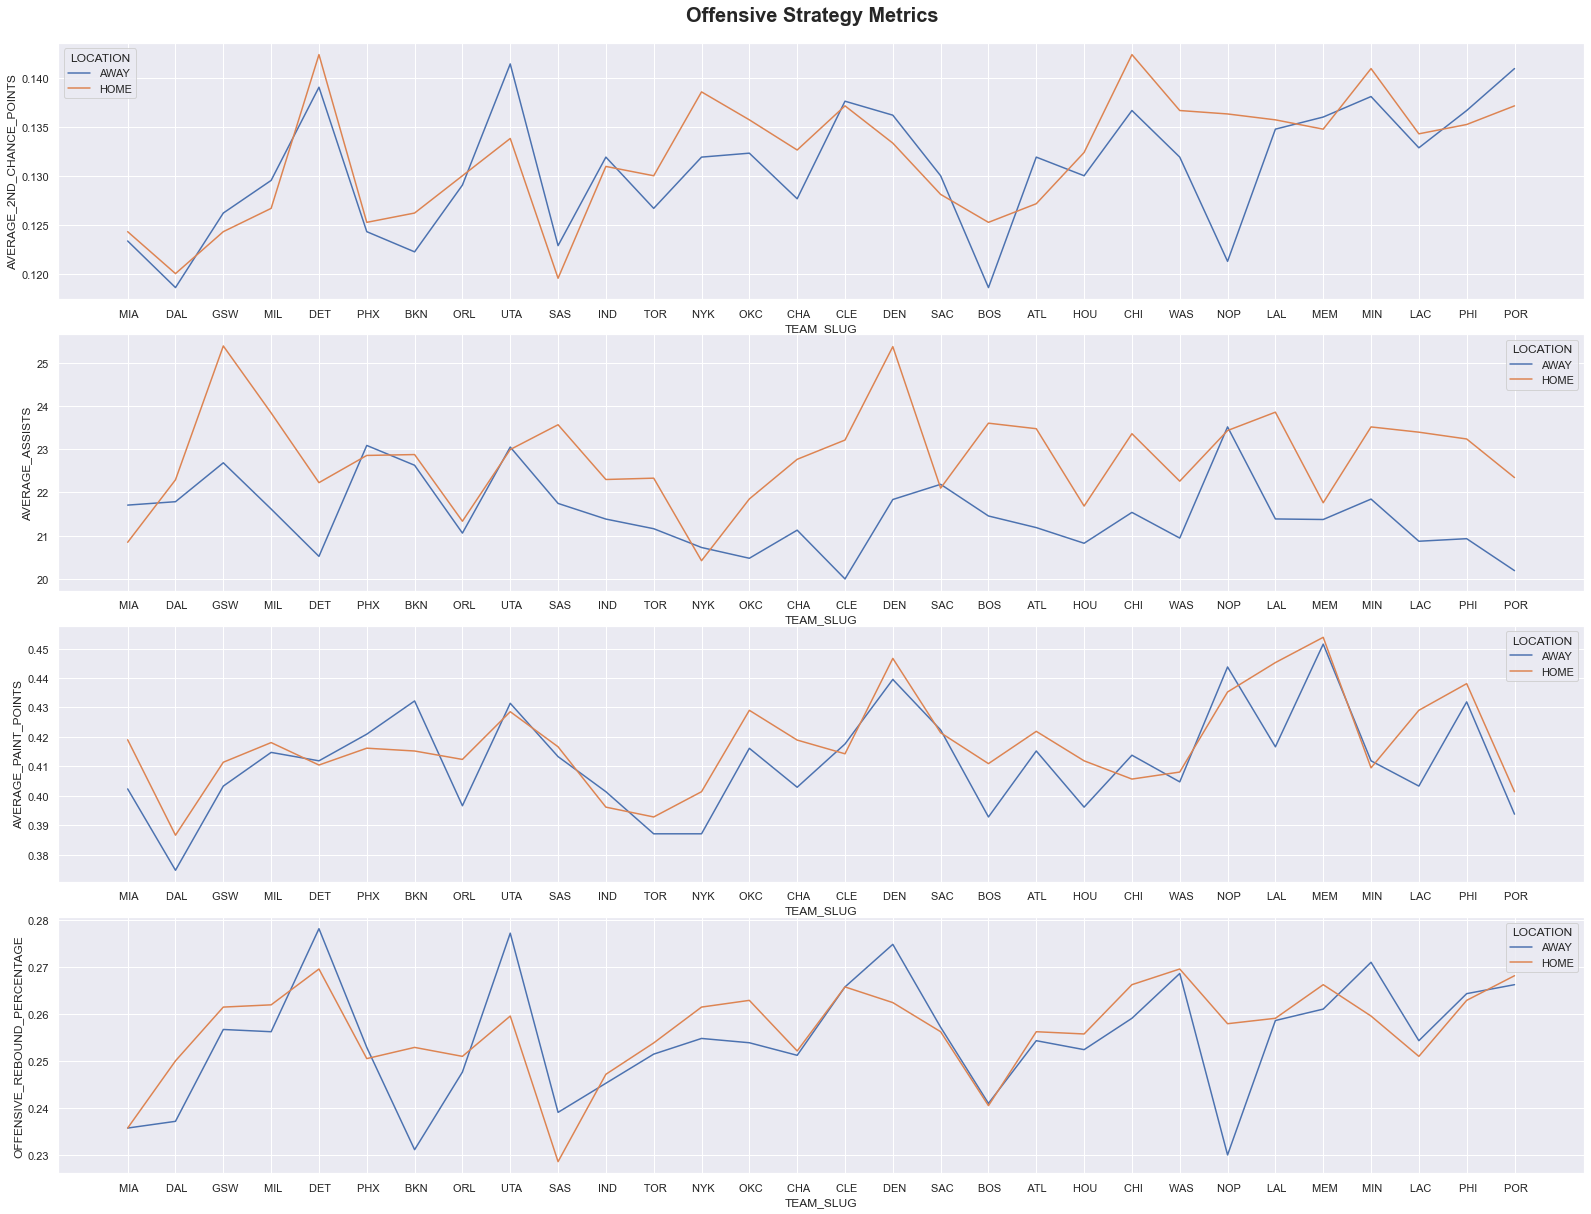

In [85]:
df3 = pd.DataFrame(list(Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$LOCATION', '$TEAM_SLUG'],
      'AVERAGE_2ND_CHANCE_POINTS': { '$avg': '$AVERAGE_2ND_CHANCE_POINTS' },
      'AVERAGE_ASSISTS': { '$avg': '$AVERAGE_ASSISTS' },
      'AVERAGE_PAINT_POINTS': { '$avg': '$AVERAGE_PAINT_POINTS' },
      'OFFENSIVE_REBOUND_PERCENTAGE': { '$avg': '$OFFENSIVE_REBOUND_PERCENTAGE' }
    }
  }
]
)))
pd.set_option('precision', 2)
df3['_id'] = df3['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df3['_id'] = df3['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df3['_id'] = df3['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df3[['LOCATION','TEAM_SLUG']] = df3['_id'].str.split(',', expand=True)
df3.drop(['_id'],axis=1,inplace=True)
print(df3.head())
# plt.figure(figsize=(22, 7))
fig, axes = plt.subplots(4, 1, figsize=(22,17), sharey=False, sharex=False)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Offensive Strategy Metrics', fontsize=20, fontweight='bold')
sns.lineplot(ax=axes[0], data=df3, x="TEAM_SLUG", y="AVERAGE_2ND_CHANCE_POINTS", hue = 'LOCATION')
sns.lineplot(ax=axes[1], data=df3, x="TEAM_SLUG", y="AVERAGE_ASSISTS", hue = 'LOCATION')
sns.lineplot(ax=axes[2], data=df3, x="TEAM_SLUG", y="AVERAGE_PAINT_POINTS", hue = 'LOCATION')
sns.lineplot(ax=axes[3], data=df3, x="TEAM_SLUG", y="OFFENSIVE_REBOUND_PERCENTAGE", hue = 'LOCATION')

4. 
-- Point distribution of top 5 and bottom 5 teams
-- Top 5 teams - Point Distribution %
SELECT `game_analysis`.`TEAM_SLUG` AS `TEAM_SLUG`,
  AVG(`game_analysis`.`AVERAGE_2ND_CHANCE_POINTS`) AS `AVERAGE_2ND_CHANCE_POINTS`,
  AVG(`game_analysis`.`AVERAGE_2_POINT_GOAL_PERCENTAGE`) AS `AVERAGE_2_POINT_GOAL_PERCENTAGE`,
  AVG(`game_analysis`.`AVERAGE_3_POINT_GOAL_PERCENTAGE`) AS `AVERAGE_3_POINT_GOAL_PERCENTAGE`,
  AVG(`game_analysis`.`AVERAGE_PAINT_POINTS`) AS `AVERAGE_PAINT_POINTS`,
  AVG(`game_analysis`.`AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE`) AS `AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE`,
  SUM(WIN_COUNT)*100/SUM(GAME_COUNT) AS `$__alias__0`
FROM `game_analysis`
WHERE (`game_analysis`.`SEASON` >= '2000')
GROUP BY 1
ORDER BY `$__alias__0` DESC,`TEAM_SLUG` ASC
LIMIT 5;


In [20]:
x4 = Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      'AVERAGE_2ND_CHANCE_POINTS': { '$avg': '$AVERAGE_2ND_CHANCE_POINTS' },
      'AVERAGE_2_POINT_GOAL_PERCENTAGE': { '$avg': '$AVERAGE_2_POINT_GOAL_PERCENTAGE' },
      'AVERAGE_3_POINT_GOAL_PERCENTAGE': { '$avg': '$AVERAGE_3_POINT_GOAL_PERCENTAGE' },
      'AVERAGE_PAINT_POINTS': { '$avg': '$AVERAGE_PAINT_POINTS' },
      'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': { '$avg': '$AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE' },
      'WIN_COUNT': { '$sum': '$WIN_COUNT' },
      'GAME_COUNT': { '$sum': '$GAME_COUNT' }
    }
  },
  {
    '$set': {
      'win_percentage': {'$multiply':[{'$divide': ['$WIN_COUNT', '$GAME_COUNT']}, 100] }
    }
  },
  { '$sort' : {'win_percentage':-1, 'TEAM_SLUG':1} },
  { '$limit' : 5 }
]
)
CNT = 0
for i in x4:
    CNT+= 1
    print(i)
print(CNT)

{'_id': ['SAS'], 'AVERAGE_2ND_CHANCE_POINTS': 0.12119047619047618, 'AVERAGE_2_POINT_GOAL_PERCENTAGE': 0.3771428571428571, 'AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.07452380952380952, 'AVERAGE_PAINT_POINTS': 0.415, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.1488095238095238, 'WIN_COUNT': 1103, 'GAME_COUNT': 1635, 'win_percentage': 67.4617737003058}
{'_id': ['DAL'], 'AVERAGE_2ND_CHANCE_POINTS': 0.11928571428571429, 'AVERAGE_2_POINT_GOAL_PERCENTAGE': 0.3711904761904762, 'AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.08142857142857143, 'AVERAGE_PAINT_POINTS': 0.3807142857142857, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.1457142857142857, 'WIN_COUNT': 967, 'GAME_COUNT': 1638, 'win_percentage': 59.03540903540904}
{'_id': ['OKC'], 'AVERAGE_2ND_CHANCE_POINTS': 0.13441176470588237, 'AVERAGE_2_POINT_GOAL_PERCENTAGE': 0.36911764705882355, 'AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.07411764705882352, 'AVERAGE_PAINT_POINTS': 0.42411764705882354, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.16088235294117648, 'W

   AVERAGE_2ND_CHANCE_POINTS  AVERAGE_2_POINT_GOAL_PERCENTAGE  \
0                       0.12                             0.38   
1                       0.12                             0.37   
2                       0.13                             0.37   
3                       0.13                             0.36   
4                       0.12                             0.37   

   AVERAGE_3_POINT_GOAL_PERCENTAGE  AVERAGE_PAINT_POINTS  \
0                             0.07                  0.41   
1                             0.08                  0.38   
2                             0.07                  0.42   
3                             0.09                  0.40   
4                             0.08                  0.40   

   AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE TEAM_SLUG  
0                                      0.15       SAS  
1                                      0.15       DAL  
2                                      0.16       OKC  
3                       

/Users/akshayasrinivasan/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/akshayasrinivasan/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


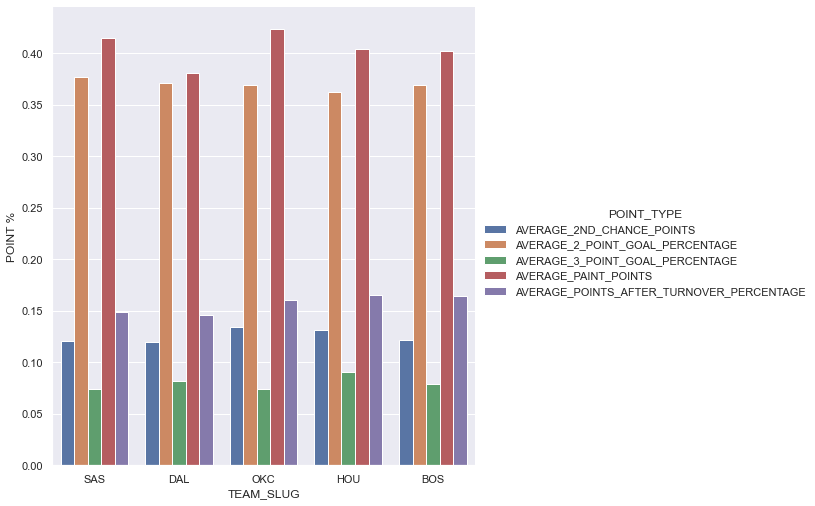

In [94]:
df4 = pd.DataFrame(list(Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      'AVERAGE_2ND_CHANCE_POINTS': { '$avg': '$AVERAGE_2ND_CHANCE_POINTS' },
      'AVERAGE_2_POINT_GOAL_PERCENTAGE': { '$avg': '$AVERAGE_2_POINT_GOAL_PERCENTAGE' },
      'AVERAGE_3_POINT_GOAL_PERCENTAGE': { '$avg': '$AVERAGE_3_POINT_GOAL_PERCENTAGE' },
      'AVERAGE_PAINT_POINTS': { '$avg': '$AVERAGE_PAINT_POINTS' },
      'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': { '$avg': '$AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE' },
      'WIN_COUNT': { '$sum': '$WIN_COUNT' },
      'GAME_COUNT': { '$sum': '$GAME_COUNT' }
    }
  },
  {
    '$set': {
      'win_percentage': {'$multiply':[{'$divide': ['$WIN_COUNT', '$GAME_COUNT']}, 100] }
    }
  },
  { '$sort' : {'win_percentage':-1, 'TEAM_SLUG':1} },
  { '$limit' : 5 }
]
)))
pd.set_option('precision', 2)
df4['_id'] = df4['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df4['_id'] = df4['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df4['_id'] = df4['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df4[['TEAM_SLUG']] = df4['_id']
df4.drop(['_id'],axis=1,inplace=True)
df4.drop(['win_percentage'],axis=1,inplace=True)
df4.drop(['WIN_COUNT'],axis=1,inplace=True)
df4.drop(['GAME_COUNT'],axis=1,inplace=True)
print(df4.head())
df4 = pd.melt(df4, id_vars="TEAM_SLUG", var_name="POINT_TYPE", value_name="POINT %")
sns.factorplot(x='TEAM_SLUG', y='POINT %', hue='POINT_TYPE', data=df4, kind='bar', size=7, aspect=1)

5. 
-- Bottom 5 teams - Point Distribution %
SELECT `game_analysis`.`TEAM_SLUG` AS `TEAM_SLUG`,
  AVG(`game_analysis`.`AVERAGE_2ND_CHANCE_POINTS`) AS `AVERAGE_2ND_CHANCE_POINTS`,
  AVG(`game_analysis`.`AVERAGE_2_POINT_GOAL_PERCENTAGE`) AS `AVERAGE_2_POINT_GOAL_PERCENTAGE`,
  AVG(`game_analysis`.`AVERAGE_3_POINT_GOAL_PERCENTAGE`) AS `AVERAGE_3_POINT_GOAL_PERCENTAGE`,
  AVG(`game_analysis`.`AVERAGE_PAINT_POINTS`) AS `AVERAGE_PAINT_POINTS`,
  AVG(`game_analysis`.`AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE`) AS `AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE`,
  SUM(WIN_COUNT)*100/SUM(GAME_COUNT) AS `$__alias__0`
FROM `game_analysis`
WHERE (`game_analysis`.`SEASON` >= '2000')
GROUP BY 1
ORDER BY `$__alias__0` ASC,`TEAM_SLUG` ASC
LIMIT 5;


In [22]:
x5 = Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      'AVERAGE_2ND_CHANCE_POINTS': { '$avg': '$AVERAGE_2ND_CHANCE_POINTS' },
      'AVERAGE_2_POINT_GOAL_PERCENTAGE': { '$avg': '$AVERAGE_2_POINT_GOAL_PERCENTAGE' },
      'AVERAGE_3_POINT_GOAL_PERCENTAGE': { '$avg': '$AVERAGE_3_POINT_GOAL_PERCENTAGE' },
      'AVERAGE_PAINT_POINTS': { '$avg': '$AVERAGE_PAINT_POINTS' },
      'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': { '$avg': '$AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE' },
      'WIN_COUNT': { '$sum': '$WIN_COUNT' },
      'GAME_COUNT': { '$sum': '$GAME_COUNT' }
    }
  },
  {
    '$set': {
      'win_percentage': {'$multiply':[{'$divide': ['$WIN_COUNT', '$GAME_COUNT']}, 100] }
    }
  },
  { '$sort' : {'win_percentage':1, 'TEAM_SLUG':1} },
  { '$limit' : 5 }
]
)
CNT = 0
for i in x5:
    CNT+= 1
    print(i)
print(CNT)

{'_id': ['NYK'], 'AVERAGE_2ND_CHANCE_POINTS': 0.13523809523809524, 'AVERAGE_2_POINT_GOAL_PERCENTAGE': 0.3730952380952381, 'AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.07642857142857143, 'AVERAGE_PAINT_POINTS': 0.39428571428571424, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.17047619047619048, 'WIN_COUNT': 660, 'GAME_COUNT': 1631, 'win_percentage': 40.4659717964439}
{'_id': ['MIN'], 'AVERAGE_2ND_CHANCE_POINTS': 0.13952380952380952, 'AVERAGE_2_POINT_GOAL_PERCENTAGE': 0.37666666666666665, 'AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.06214285714285714, 'AVERAGE_PAINT_POINTS': 0.4107142857142857, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.1661904761904762, 'WIN_COUNT': 659, 'GAME_COUNT': 1628, 'win_percentage': 40.47911547911548}
{'_id': ['CHA'], 'AVERAGE_2ND_CHANCE_POINTS': 0.1302777777777778, 'AVERAGE_2_POINT_GOAL_PERCENTAGE': 0.37083333333333335, 'AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.07222222222222223, 'AVERAGE_PAINT_POINTS': 0.4113888888888889, 'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': 0.16138888

   AVERAGE_2ND_CHANCE_POINTS  AVERAGE_2_POINT_GOAL_PERCENTAGE  \
0                       0.14                             0.37   
1                       0.14                             0.38   
2                       0.13                             0.37   
3                       0.13                             0.37   
4                       0.13                             0.37   

   AVERAGE_3_POINT_GOAL_PERCENTAGE  AVERAGE_PAINT_POINTS  \
0                             0.08                  0.39   
1                             0.06                  0.41   
2                             0.07                  0.41   
3                             0.07                  0.41   
4                             0.07                  0.42   

   AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE TEAM_SLUG  
0                                      0.17       NYK  
1                                      0.17       MIN  
2                                      0.16       CHA  
3                       

/Users/akshayasrinivasan/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/akshayasrinivasan/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


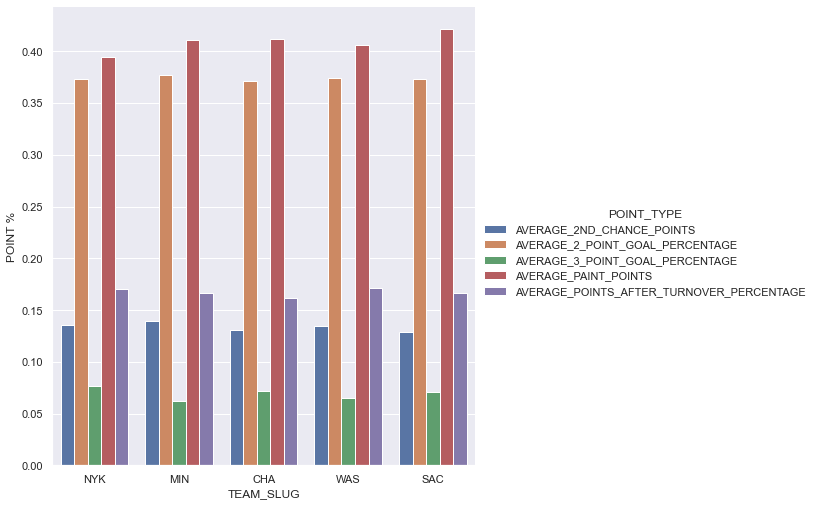

In [97]:
df5 = pd.DataFrame(list(Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      'AVERAGE_2ND_CHANCE_POINTS': { '$avg': '$AVERAGE_2ND_CHANCE_POINTS' },
      'AVERAGE_2_POINT_GOAL_PERCENTAGE': { '$avg': '$AVERAGE_2_POINT_GOAL_PERCENTAGE' },
      'AVERAGE_3_POINT_GOAL_PERCENTAGE': { '$avg': '$AVERAGE_3_POINT_GOAL_PERCENTAGE' },
      'AVERAGE_PAINT_POINTS': { '$avg': '$AVERAGE_PAINT_POINTS' },
      'AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE': { '$avg': '$AVERAGE_POINTS_AFTER_TURNOVER_PERCENTAGE' },
      'WIN_COUNT': { '$sum': '$WIN_COUNT' },
      'GAME_COUNT': { '$sum': '$GAME_COUNT' }
    }
  },
  {
    '$set': {
      'win_percentage': {'$multiply':[{'$divide': ['$WIN_COUNT', '$GAME_COUNT']}, 100] }
    }
  },
  { '$sort' : {'win_percentage':1, 'TEAM_SLUG':1} },
  { '$limit' : 5 }
]
)))
pd.set_option('precision', 2)
df5['_id'] = df5['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df5['_id'] = df5['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df5['_id'] = df5['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df5[['TEAM_SLUG']] = df5['_id']
df5.drop(['_id'],axis=1,inplace=True)
df5.drop(['win_percentage'],axis=1,inplace=True)
df5.drop(['WIN_COUNT'],axis=1,inplace=True)
df5.drop(['GAME_COUNT'],axis=1,inplace=True)
print(df5.head())
df5 = pd.melt(df5, id_vars="TEAM_SLUG", var_name="POINT_TYPE", value_name="POINT %")
sns.factorplot(x='TEAM_SLUG', y='POINT %', hue='POINT_TYPE', data=df5, kind='bar', size=7, aspect=1)

"""6. 
-- Offensive rebound % over years vs win %
SELECT 
	`game_analysis`.`SEASON` AS `SEASON`,
	AVG((`game_analysis`.`WIN_COUNT` / `game_analysis`.`GAME_COUNT`)) AS `WIN %`,
	AVG(`game_analysis`.`OFFENSIVE_REBOUND_PERCENTAGE`) AS `OFFENSIVE_REBOUND_PERCENTAGE`
FROM 
	`game_analysis`
WHERE (`game_analysis`.`SEASON` >= '2000')
GROUP BY 1;"""

In [24]:
x6 = Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$SEASON'],
      'WIN %': { '$avg': {'$divide': ['$WIN_COUNT', '$GAME_COUNT']}},
      'OFFENSIVE_REBOUND_PERCENTAGE': { '$avg': '$OFFENSIVE_REBOUND_PERCENTAGE' }
    }
  }
]
)
CNT = 0
for i in x6:
    CNT+= 1
    print(i)
print(CNT)

{'_id': [2002], 'WIN %': 0.5066182455245356, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.28145454545454546}
{'_id': [2001], 'WIN %': 0.5052086858890453, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.28563636363636363}
{'_id': [2007], 'WIN %': 0.5058568622517005, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.26473684210526316}
{'_id': [2000], 'WIN %': 0.5066249466655971, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.2801851851851852}
{'_id': [2005], 'WIN %': 0.5052824570762549, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.2715789473684211}
{'_id': [2017], 'WIN %': 0.5, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.22083333333333333}
{'_id': [2006], 'WIN %': 0.5048723019974962, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.26824561403508773}
{'_id': [2010], 'WIN %': 0.5032359863072314, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.2617241379310345}
{'_id': [2012], 'WIN %': 0.5024618140575148, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.26237288135593223}
{'_id': [2008], 'WIN %': 0.5039039542636108, 'OFFENSIVE_REBOUND_PERCENTAGE': 0.2655172413793104}
{'_id': [2019], 'WIN %': 0.495672841515

   WIN %  OFFENSIVE_REBOUND_PERCENTAGE SEASON
0    0.5                          0.22   2019
1    0.5                          0.27   2008
2    0.5                          0.26   2012
3    0.5                          0.26   2010
4    0.5                          0.22   2017


<AxesSubplot:label='8fa0e666-e42e-42ed-bc3d-fcaa0fa3cbe8', xlabel='SEASON', ylabel='OFFENSIVE_REBOUND_PERCENTAGE'>

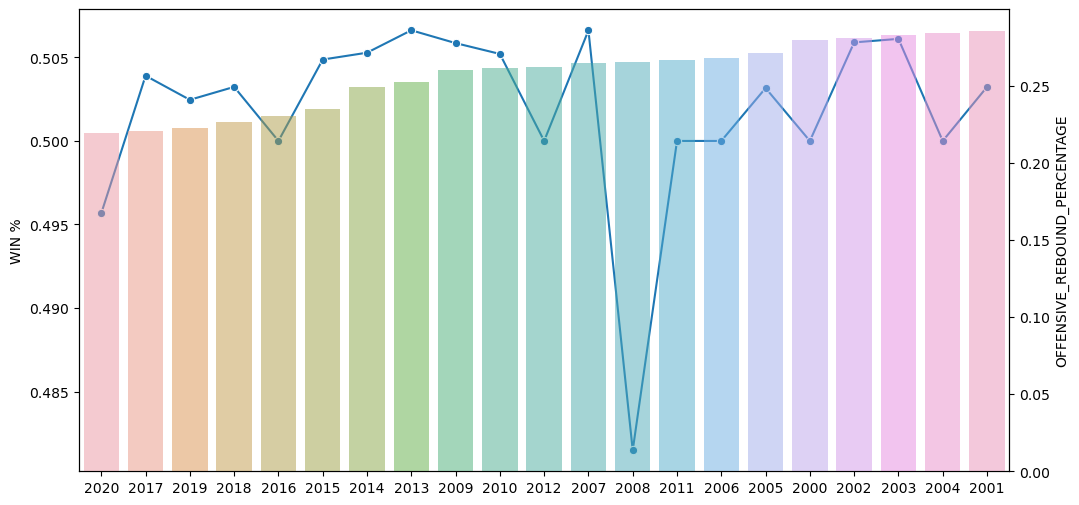

In [109]:
df6 = pd.DataFrame(list(Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$SEASON'],
      'WIN %': { '$avg': {'$divide': ['$WIN_COUNT', '$GAME_COUNT']}},
      'OFFENSIVE_REBOUND_PERCENTAGE': { '$avg': '$OFFENSIVE_REBOUND_PERCENTAGE' }
    }
  }
]
)))
pd.set_option('precision', 2)
df6['_id'] = df6['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df6['_id'] = df6['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df6['_id'] = df6['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df6[['SEASON']] = df6['_id']
df6.drop(['_id'],axis=1,inplace=True)
print(df6.head())
import matplotlib
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = df6['WIN %'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = df6, x='SEASON', y='OFFENSIVE_REBOUND_PERCENTAGE', order=df6.sort_values('OFFENSIVE_REBOUND_PERCENTAGE').SEASON, alpha=0.5, ax=ax2)

7. 
-- 3 point efficiency and win %
SELECT 
	`game_analysis`.`TEAM_SLUG` AS `TEAM_SLUG`,
	AVG(`game_analysis`.`AVERAGE_3_POINT_GOAL_EFFICIENCY`) AS `AVERAGE_3_POINT_GOAL_EFFICIENCY`,
	AVG((`game_analysis`.`WIN_COUNT` / `game_analysis`.`GAME_COUNT`)) AS `WIN %`
FROM 
	`game_analysis`
WHERE (`game_analysis`.`SEASON` >= '2000')
GROUP BY 1;


In [26]:
x7 = Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      'AVERAGE_3_POINT_GOAL_EFFICIENCY': { '$avg': '$AVERAGE_3_POINT_GOAL_EFFICIENCY' },
      'WIN %': { '$avg': {'$divide': ['$WIN_COUNT', '$GAME_COUNT']}}
    }
  }
]
)
CNT = 0
for i in x7:
    CNT+= 1
    print(i)
print(CNT)

{'_id': ['NOP'], 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.35518518518518516, 'WIN %': 0.49029386259524615}
{'_id': ['CHA'], 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.34555555555555556, 'WIN %': 0.41095939651919017}
{'_id': ['TOR'], 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.3595238095238095, 'WIN %': 0.49942182217912356}
{'_id': ['DET'], 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.34904761904761905, 'WIN %': 0.48580314661415325}
{'_id': ['CHI'], 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.3557142857142857, 'WIN %': 0.4671885323208725}
{'_id': ['ATL'], 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.3514285714285714, 'WIN %': 0.45329543265396083}
{'_id': ['LAC'], 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.3516666666666667, 'WIN %': 0.5059655430643877}
{'_id': ['GSW'], 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.36357142857142855, 'WIN %': 0.5025963980746109}
{'_id': ['PHX'], 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.35833333333333334, 'WIN %': 0.5031859845586235}
{'_id': ['DEN'], 'AVERAGE_3_POINT_GOAL_EFFICIENCY': 0.3438095238095238, 'WIN %': 

   AVERAGE_3_POINT_GOAL_EFFICIENCY  WIN % TEAM_SLUG
0                             0.38   0.68       SAS
1                             0.36   0.52       POR
2                             0.35   0.42       WAS
3                             0.36   0.55       BOS
4                             0.35   0.54       UTA


<AxesSubplot:label='4c229e11-f460-4317-90d1-a9e5aa019ce0', xlabel='TEAM_SLUG', ylabel='AVERAGE_3_POINT_GOAL_EFFICIENCY'>

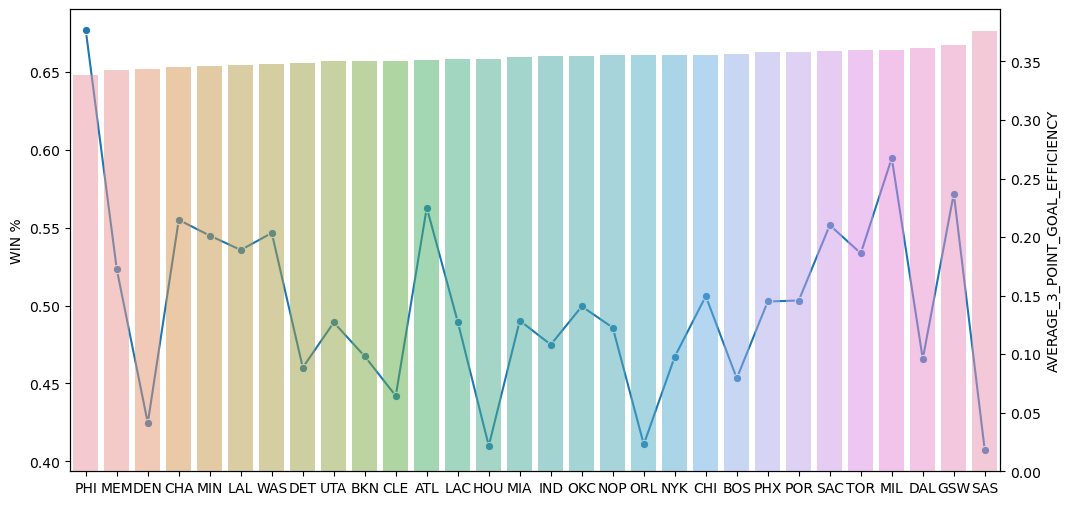

In [110]:
df7 = pd.DataFrame(list(Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      'AVERAGE_3_POINT_GOAL_EFFICIENCY': { '$avg': '$AVERAGE_3_POINT_GOAL_EFFICIENCY' },
      'WIN %': { '$avg': {'$divide': ['$WIN_COUNT', '$GAME_COUNT']}}
    }
  }
]
)))
pd.set_option('precision', 2)
df7['_id'] = df7['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df7['_id'] = df7['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df7['_id'] = df7['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df7[['TEAM_SLUG']] = df7['_id']
df7.drop(['_id'],axis=1,inplace=True)
print(df7.head())
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = df7['WIN %'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = df7, x='TEAM_SLUG', y='AVERAGE_3_POINT_GOAL_EFFICIENCY', order=df7.sort_values('AVERAGE_3_POINT_GOAL_EFFICIENCY').TEAM_SLUG, alpha=0.5, ax=ax2)

8. 
-- Free throw goal efficiency all the teams 
SELECT 
	`game_analysis`.`TEAM_SLUG` AS `TEAM_SLUG`,
	AVG((`game_analysis`.`WIN_COUNT` / `game_analysis`.`GAME_COUNT`)) AS `WIN %`,
	AVG(`game_analysis`.`FREE_THROUGH_GOAL_EFFICIENCY`) AS `FREE_THROUGH_GOAL_EFFICIENCY`
FROM 
	`game_analysis`
WHERE (`game_analysis`.`SEASON` >= '2000')
GROUP BY 1;


In [28]:
x8 = Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      'WIN %': { '$avg': {'$divide': ['$WIN_COUNT', '$GAME_COUNT']}},
      'FREE_THROUGH_GOAL_EFFICIENCY': { '$avg': '$FREE_THROUGH_GOAL_EFFICIENCY' }
    }
  }
]
)
CNT = 0
for i in x8:
    CNT+= 1
    print(i)
print(CNT)

{'_id': ['NOP'], 'WIN %': 0.49029386259524615, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.7574074074074074}
{'_id': ['CHA'], 'WIN %': 0.41095939651919017, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.7516666666666666}
{'_id': ['TOR'], 'WIN %': 0.49942182217912356, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.7795238095238096}
{'_id': ['DET'], 'WIN %': 0.48580314661415325, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.7352380952380952}
{'_id': ['CHI'], 'WIN %': 0.4671885323208725, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.758095238095238}
{'_id': ['ATL'], 'WIN %': 0.45329543265396083, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.7638095238095237}
{'_id': ['LAC'], 'WIN %': 0.5059655430643877, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.7492857142857142}
{'_id': ['GSW'], 'WIN %': 0.5025963980746109, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.7614285714285715}
{'_id': ['PHX'], 'WIN %': 0.5031859845586235, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.769047619047619}
{'_id': ['DEN'], 'WIN %': 0.5334770144278672, 'FREE_THROUGH_GOAL_EFFICIENCY': 0.7521428571428571}
{'_id': ['MIA'], 

   WIN %  FREE_THROUGH_GOAL_EFFICIENCY TEAM_SLUG
0   0.49                          0.76       NOP
1   0.41                          0.75       CHA
2   0.50                          0.78       TOR
3   0.49                          0.74       DET
4   0.47                          0.76       CHI


<AxesSubplot:label='2f4dd15b-98e7-440e-ad6e-fd73b3461055', xlabel='TEAM_SLUG', ylabel='FREE_THROUGH_GOAL_EFFICIENCY'>

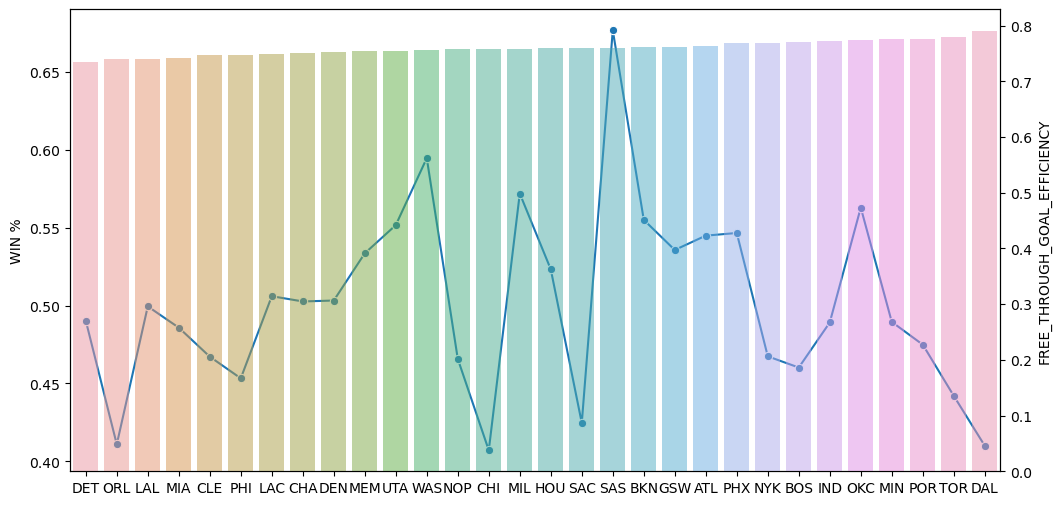

In [111]:
df8 = pd.DataFrame(list(Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      'WIN %': { '$avg': {'$divide': ['$WIN_COUNT', '$GAME_COUNT']}},
      'FREE_THROUGH_GOAL_EFFICIENCY': { '$avg': '$FREE_THROUGH_GOAL_EFFICIENCY' }
    }
  }
]
)))
pd.set_option('precision', 2)
df8['_id'] = df8['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df8['_id'] = df8['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df8['_id'] = df8['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df8[['TEAM_SLUG']] = df8['_id']
df8.drop(['_id'],axis=1,inplace=True)
print(df8.head())
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = df8['WIN %'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = df8, x='TEAM_SLUG', y='FREE_THROUGH_GOAL_EFFICIENCY', order=df8.sort_values('FREE_THROUGH_GOAL_EFFICIENCY').TEAM_SLUG, alpha=0.5, ax=ax2)

9.
-- Free throw goal percentage all the teams 
SELECT 
	`game_analysis`.`TEAM_SLUG` AS `TEAM_SLUG`,
	AVG((`game_analysis`.`WIN_COUNT` / `game_analysis`.`GAME_COUNT`)) AS `WIN %`,
	AVG(`game_analysis`.`FREE_THROUGH_GOAL_PERCENTAGE`) AS `FREE_THROUGH_GOAL_PERCENTAGE`
FROM 
	`game_analysis`
WHERE (`game_analysis`.`SEASON` >= '2000')
GROUP BY 1;


In [30]:
x9 = Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      'WIN %': { '$avg': {'$divide': ['$WIN_COUNT', '$GAME_COUNT']}},
      'FREE_THROUGH_GOAL_PERCENTAGE': { '$avg': '$FREE_THROUGH_GOAL_PERCENTAGE' }
    }
  }
]
)
CNT = 0
for i in x9:
    CNT+= 1
    print(i)
print(CNT)

{'_id': ['PHX'], 'WIN %': 0.5031859845586235, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.16976190476190475}
{'_id': ['PHI'], 'WIN %': 0.4673918114761569, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.1838095238095238}
{'_id': ['ORL'], 'WIN %': 0.4602119505827438, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.1757142857142857}
{'_id': ['MIL'], 'WIN %': 0.48912610534239354, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.175}
{'_id': ['HOU'], 'WIN %': 0.5627742819305764, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.18404761904761907}
{'_id': ['BKN'], 'WIN %': 0.4894827662534659, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.18266666666666667}
{'_id': ['MEM'], 'WIN %': 0.4748865593944267, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.1821951219512195}
{'_id': ['SAC'], 'WIN %': 0.4420468283502393, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.18214285714285716}
{'_id': ['NYK'], 'WIN %': 0.4100334288670984, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.17714285714285716}
{'_id': ['NOP'], 'WIN %': 0.49029386259524615, 'FREE_THROUGH_GOAL_PERCENTAGE': 0.16777777777777778}
{'_id': ['POR'], 'WIN %':

   WIN %  FREE_THROUGH_GOAL_PERCENTAGE TEAM_SLUG
0   0.50                          0.17       GSW
1   0.47                          0.18       PHI
2   0.49                          0.17       MIL
3   0.46                          0.18       ORL
4   0.47                          0.18       MEM


<AxesSubplot:label='df3f5b3f-8e7b-43d5-9d5f-0d4a2c8d32d5', xlabel='TEAM_SLUG', ylabel='FREE_THROUGH_GOAL_PERCENTAGE'>

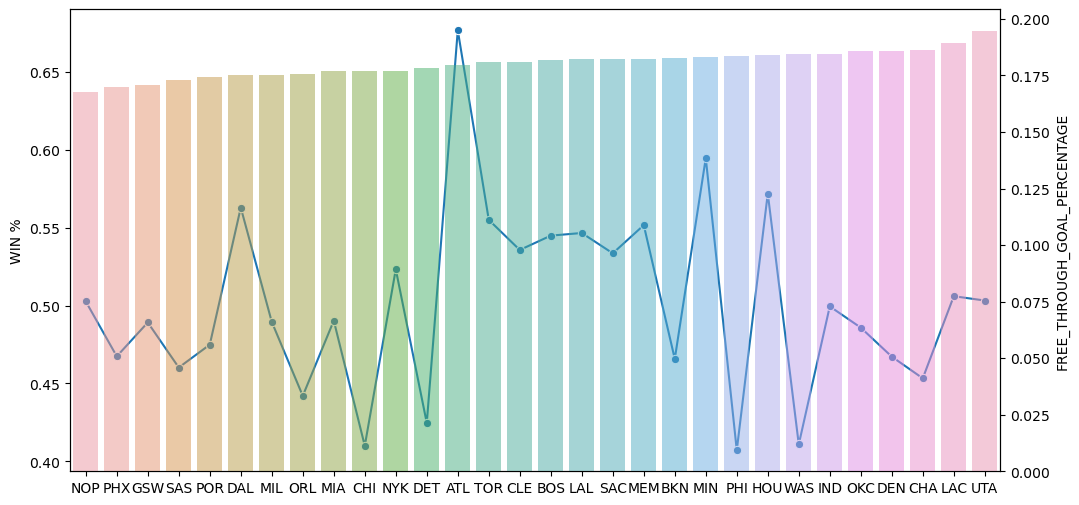

In [112]:
df9 = pd.DataFrame(list(Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      'WIN %': { '$avg': {'$divide': ['$WIN_COUNT', '$GAME_COUNT']}},
      'FREE_THROUGH_GOAL_PERCENTAGE': { '$avg': '$FREE_THROUGH_GOAL_PERCENTAGE' }
    }
  }
]
)))
pd.set_option('precision', 2)
df9['_id'] = df9['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df9['_id'] = df9['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df9['_id'] = df9['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df9[['TEAM_SLUG']] = df9['_id']
df9.drop(['_id'],axis=1,inplace=True)
print(df9.head())
matplotlib.rc_file_defaults()
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(12,6))
sns.lineplot(data = df9['WIN %'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()
sns.barplot(data = df9, x='TEAM_SLUG', y='FREE_THROUGH_GOAL_PERCENTAGE', order=df9.sort_values('FREE_THROUGH_GOAL_PERCENTAGE').TEAM_SLUG, alpha=0.5, ax=ax2)

10. 
-- -- TEAM ANALYSIS
-- Salary Distribution of Teams
SELECT 
	`team_winning_stats_with_salary`.`TEAM_SLUG` AS `TEAM_SLUG`,
	SUM(`team_winning_stats_with_salary`.`2021-2022 SALARY`) AS `2021-2022 SALARY`,
	SUM(`team_winning_stats_with_salary`.`2022-2023 SALARY`) AS `2022-2023 SALARY`,
	SUM(`team_winning_stats_with_salary`.`2023-2024 SALARY`) AS `2023-2024 SALARY`,
	SUM(`team_winning_stats_with_salary`.`2024-2025 SALARY`) AS `2024-2025 SALARY`,
	SUM(`team_winning_stats_with_salary`.`2025-2026 SALARY`) AS `2025-2026 SALARY`
FROM 
	`team_winning_stats_with_salary`
GROUP BY 1;


In [32]:
x10 = Team_Analysis.aggregate(
[
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      '2021-2022 SALARY': { '$sum': '$2021-2022 SALARY' },
      '2022-2023 SALARY': { '$sum': '$2022-2023 SALARY' },
      '2023-2024 SALARY': { '$sum': '$2023-2024 SALARY' },
      '2024-2025 SALARY': { '$sum': '$2024-2025 SALARY' },
      '2025-2026 SALARY': { '$sum': '$2025-2026 SALARY' }
    }
  }
]
)
CNT = 0
for i in x10:
    CNT+= 1
    print(i)
print(CNT)

{'_id': ['MIL'], '2021-2022 SALARY': 143532000, '2022-2023 SALARY': 135508000, '2023-2024 SALARY': 122050000, '2024-2025 SALARY': 87285300, '2025-2026 SALARY': 51928800}
{'_id': ['ORL'], '2021-2022 SALARY': 101548000, '2022-2023 SALARY': 45400000, '2023-2024 SALARY': 34400000, '2024-2025 SALARY': 17400000, '2025-2026 SALARY': 0}
{'_id': ['PHI'], '2021-2022 SALARY': 129160000, '2022-2023 SALARY': 118760000, '2023-2024 SALARY': 77163600, '2024-2025 SALARY': 40338100, '2025-2026 SALARY': 0}
{'_id': ['SAC'], '2021-2022 SALARY': 100042000, '2022-2023 SALARY': 69723000, '2023-2024 SALARY': 51664200, '2024-2025 SALARY': 34844000, '2025-2026 SALARY': 37092000}
{'_id': ['MEM'], '2021-2022 SALARY': 87045500, '2022-2023 SALARY': 25732600, '2023-2024 SALARY': 10400000, '2024-2025 SALARY': 0, '2025-2026 SALARY': 0}
{'_id': ['HOU'], '2021-2022 SALARY': 92796700, '2022-2023 SALARY': 90368500, '2023-2024 SALARY': 22848600, '2024-2025 SALARY': 0, '2025-2026 SALARY': 0}
{'_id': ['NOP'], '2021-2022 SALAR

   2021-2022 SALARY  2022-2023 SALARY  2023-2024 SALARY  2024-2025 SALARY  \
0         165982000         157168000          19928600                 0   
1         160107000         101954000          70805700                 0   
2         144295000          80128600          77520100          48787800   
3         143532000         135508000         122050000          87285300   
4         132078000          95626900          62027500          34844000   

   2025-2026 SALARY TEAM_SLUG  
0                 0       BKN  
1                 0       GSW  
2                 0       LAC  
3          51928800       MIL  
4          37092000       BOS  


/Users/akshayasrinivasan/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/akshayasrinivasan/Desktop/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


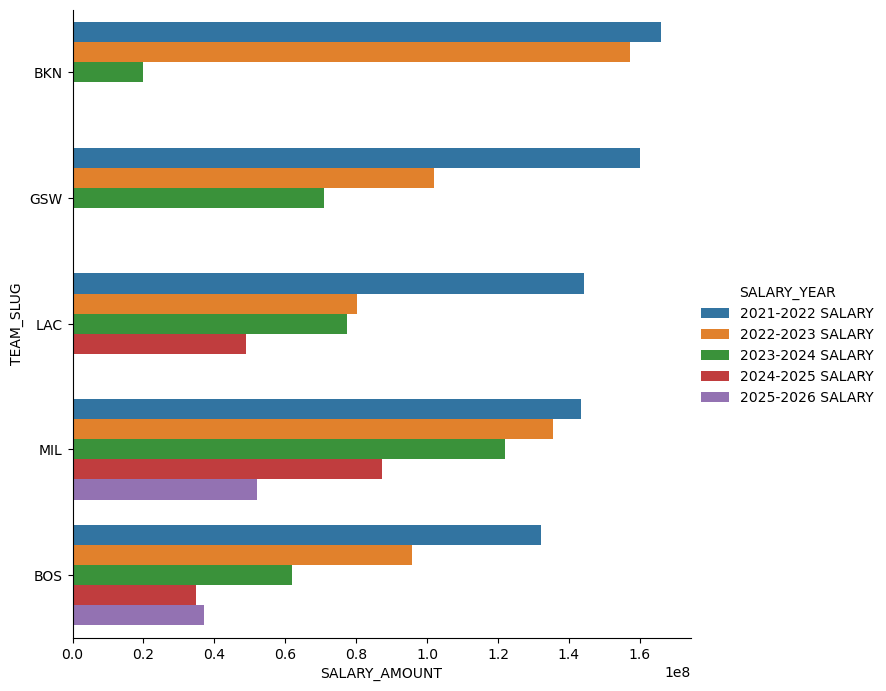

In [147]:
df10 = pd.DataFrame(list(Team_Analysis.aggregate(
[
    {
    '$group': {
      '_id': ['$TEAM_SLUG'],
      '2021-2022 SALARY': { '$sum': '$2021-2022 SALARY' },
      '2022-2023 SALARY': { '$sum': '$2022-2023 SALARY' },
      '2023-2024 SALARY': { '$sum': '$2023-2024 SALARY' },
      '2024-2025 SALARY': { '$sum': '$2024-2025 SALARY' },
      '2025-2026 SALARY': { '$sum': '$2025-2026 SALARY' }
    }
  },
  { '$sort' : {'2021-2022 SALARY':-1, '2022-2023 SALARY':-1} },
  { '$limit' : 5 }
]
)))
pd.set_option('precision', 2)
df10['_id'] = df10['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df10['_id'] = df10['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df10['_id'] = df10['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df10[['TEAM_SLUG']] = df10['_id']
df10.drop(['_id'],axis=1,inplace=True)
df10 = pd.melt(df10, id_vars="TEAM_SLUG", var_name="SALARY_YEAR", value_name="SALARY_AMOUNT")
sns.factorplot(x='SALARY_AMOUNT', y='TEAM_SLUG', hue='SALARY_YEAR', data=df10, kind='bar', size=7, aspect=1)

# fig, axes = plt.subplots(1, 5, figsize=(15,5), sharey=True, sharex=False)
# fig.suptitle('Salary Distribution of Teams', fontsize=20, fontweight='bold')
# sns.barplot(ax=axes[0], data=df10, x="2021-2022 SALARY", y="TEAM_SLUG", color = 'blue')
# sns.barplot(ax=axes[1], data=df10, x="2022-2023 SALARY", y="TEAM_SLUG", color = 'orange')
# sns.barplot(ax=axes[2], data=df10, x="2023-2024 SALARY", y="TEAM_SLUG", color = 'green')
# sns.barplot(ax=axes[3], data=df10, x="2024-2025 SALARY", y="TEAM_SLUG", color = 'red')
# sns.barplot(ax=axes[4], data=df10, x="2025-2026 SALARY", y="TEAM_SLUG", color = 'purple')

11.
-- Win/Loss % of Teams and Team salary vs win %
SELECT 
	`team_winning_stats_with_salary`.`TEAM_NAME` AS `TEAM_NAME`,
	MIN(`team_winning_stats_with_salary`.`YEAR_FOUNDED`) AS `YEAR_FOUNDED`,
	SUM(`team_winning_stats_with_salary`.`2021-2022 SALARY`) AS `2021-2022 SALARY`,
	SUM(`team_winning_stats_with_salary`.`TOTAL WIN %`) AS `TOTAL WIN %`,
	SUM(`team_winning_stats_with_salary`.`TOTAL LOSS %`) AS `TOTAL LOSS %`,
	SUM(`team_winning_stats_with_salary`.`HOME WIN %`) AS `HOME WIN %`,
	SUM(`team_winning_stats_with_salary`.`HOME LOSS %`) AS `HOME LOSS %`,
	SUM(`team_winning_stats_with_salary`.`AWAY WIN %`) AS `AWAY WIN %`,
	SUM(`team_winning_stats_with_salary`.`AWAY LOSS %`) AS `AWAY LOSS %`
FROM 
	`team_winning_stats_with_salary`
GROUP BY 1;


In [34]:
x11 = Team_Analysis.aggregate(
[
    {
    '$group': {
      '_id': ['$TEAM_NAME'],
      'YEAR_FOUNDED': { '$min': '$YEAR_FOUNDED' },
      '2021-2022 SALARY': { '$sum': '$2021-2022 SALARY' },
      'TOTAL WIN %': { '$sum': '$TOTAL WIN %' },
      'TOTAL LOSS %': { '$sum': '$TOTAL LOSS %' },
      'HOME WIN %': { '$sum': '$HOME WIN %' },
      'HOME LOSS %': { '$sum': '$HOME LOSS %' },
      'AWAY WIN %': { '$sum': '$AWAY WIN %' },
      'AWAY LOSS %': { '$sum': '$AWAY LOSS %' },
    }
  }
]
)
CNT = 0
for i in x11:
    CNT+= 1
    print(i)
print(CNT)

{'_id': ['Orlando Magic'], 'YEAR_FOUNDED': 1989, '2021-2022 SALARY': 101548000, 'TOTAL WIN %': 0.47, 'TOTAL LOSS %': 0.53, 'HOME WIN %': 0.57, 'HOME LOSS %': 0.43, 'AWAY WIN %': 0.37, 'AWAY LOSS %': 0.63}
{'_id': ['Oklahoma City Thunder'], 'YEAR_FOUNDED': 1967, '2021-2022 SALARY': 49837700, 'TOTAL WIN %': 0.63, 'TOTAL LOSS %': 0.38, 'HOME WIN %': 0.65, 'HOME LOSS %': 0.35, 'AWAY WIN %': 0.51, 'AWAY LOSS %': 0.49}
{'_id': ['Dallas Mavericks'], 'YEAR_FOUNDED': 1980, '2021-2022 SALARY': 84970900, 'TOTAL WIN %': 0.49, 'TOTAL LOSS %': 0.51, 'HOME WIN %': 0.59, 'HOME LOSS %': 0.41, 'AWAY WIN %': 0.42, 'AWAY LOSS %': 0.58}
{'_id': ['Miami Heat'], 'YEAR_FOUNDED': 1988, '2021-2022 SALARY': 77829000, 'TOTAL WIN %': 0.52, 'TOTAL LOSS %': 0.47, 'HOME WIN %': 0.63, 'HOME LOSS %': 0.37, 'AWAY WIN %': 0.43, 'AWAY LOSS %': 0.57}
{'_id': ['Detroit Pistons'], 'YEAR_FOUNDED': 1948, '2021-2022 SALARY': 103380000, 'TOTAL WIN %': 0.45, 'TOTAL LOSS %': 0.54, 'HOME WIN %': 0.59, 'HOME LOSS %': 0.41, 'AWAY WIN

   YEAR_FOUNDED  2021-2022 SALARY  TOTAL WIN %  TOTAL LOSS %  HOME WIN %  \
0          1976          58174100         0.67          0.33        0.74   
1          1967          49837700         0.63          0.38        0.65   
2          1974         130398000         0.60          0.40        0.69   
3          1948         119995000         0.58          0.42        0.69   
4          1946         132078000         0.55          0.45        0.68   

   HOME LOSS %  AWAY WIN %  AWAY LOSS %              TEAM_NAME  
0         0.26        0.57         0.43      San Antonio Spurs  
1         0.35        0.51         0.49  Oklahoma City Thunder  
2         0.31        0.46         0.54              Utah Jazz  
3         0.31        0.50         0.50     Los Angeles Lakers  
4         0.32        0.47         0.53         Boston Celtics  


<AxesSubplot:xlabel='TEAM_NAME', ylabel='TOTAL LOSS %'>

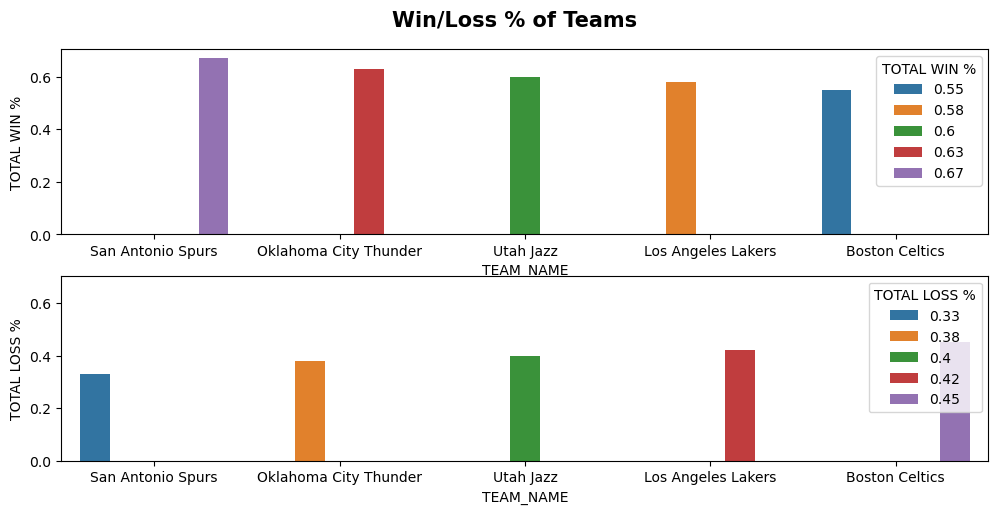

In [170]:
df11 = pd.DataFrame(list(Team_Analysis.aggregate(
[
    {
    '$group': {
      '_id': ['$TEAM_NAME'],
      'YEAR_FOUNDED': { '$min': '$YEAR_FOUNDED' },
      '2021-2022 SALARY': { '$sum': '$2021-2022 SALARY' },
      'TOTAL WIN %': { '$sum': '$TOTAL WIN %' },
      'TOTAL LOSS %': { '$sum': '$TOTAL LOSS %' },
      'HOME WIN %': { '$sum': '$HOME WIN %' },
      'HOME LOSS %': { '$sum': '$HOME LOSS %' },
      'AWAY WIN %': { '$sum': '$AWAY WIN %' },
      'AWAY LOSS %': { '$sum': '$AWAY LOSS %' },
    }
  },
  { '$sort' : {'TOTAL WIN %':-1} },
  { '$limit' : 5 }
    
]
)))
pd.set_option('precision', 2)
df11['_id'] = df11['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df11['_id'] = df11['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df11['_id'] = df11['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df11[['TEAM_NAME']] = df11['_id']
df11.drop(['_id'],axis=1,inplace=True)
print(df11.head())
fig, axes = plt.subplots(2, 1, figsize=(10,5), sharey=True, sharex=False)
fig.tight_layout()
fig.subplots_adjust(top=0.9)
fig.suptitle('Win/Loss % of Teams', fontsize=15, fontweight='bold')
sns.barplot(ax=axes[0], data=df11, x="TEAM_NAME", y="TOTAL WIN %", hue = 'TOTAL WIN %')
sns.barplot(ax=axes[1], data=df11, x="TEAM_NAME", y="TOTAL LOSS %", hue = 'TOTAL LOSS %')

12. 
-- Average foul and FT % for home and away teams over the years
SELECT 
	`game_analysis`.`LOCATION` AS `LOCATION`,
	`game_analysis`.`SEASON` AS `SEASON`,
	AVG(`game_analysis`.`AVERGAE_FOULS`) AS `AVERGAE_FOULS`,
	AVG(`game_analysis`.`FREE_THROUGH_GOAL_PERCENTAGE`) AS `FREE_THROUGH_GOAL_PERCENTAGE`
FROM 
	`game_analysis`
	INNER JOIN 
    (
	SELECT 
		`game_analysis`.`SEASON` AS `SEASON`
	FROM 
		`game_analysis`
	WHERE (`game_analysis`.`SEASON` >= '2000')
	GROUP BY 1
	) `t0` 
    ON (`game_analysis`.`SEASON` = `t0`.`SEASON`)
GROUP BY 1,2;


SELECT 
	`game_analysis`.`LOCATION` AS `LOCATION`,
	`game_analysis`.`SEASON` AS `SEASON`,
	AVG(`game_analysis`.`AVERGAE_FOULS`) AS `AVERGAE_FOULS`,
	AVG(`game_analysis`.`FREE_THROUGH_GOAL_PERCENTAGE`) AS `FREE_THROUGH_GOAL_PERCENTAGE`
FROM 
	`game_analysis`
WHERE `SEASON` >= '2000'
GROUP BY 1,2;

In [171]:
x12 = Game_Analysis.aggregate(
[
    {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$LOCATION', '$SEASON' ],
      'AVERGAE_FOULS': { '$avg': '$AVERGAE_FOULS' },
      'FREE_THROUGH_GOAL_PERCENTAGE': { '$sum': '$FREE_THROUGH_GOAL_PERCENTAGE'}
    }
  }
]
)
CNT = 0
for i in x12:
    CNT+= 1
    print(i)
print(CNT)

{'_id': ['HOME', 2008], 'AVERGAE_FOULS': 20.691, 'FREE_THROUGH_GOAL_PERCENTAGE': 5.8100000000000005}
{'_id': ['AWAY', 2005], 'AVERGAE_FOULS': 23.337407407407408, 'FREE_THROUGH_GOAL_PERCENTAGE': 5.39}
{'_id': ['HOME', 2016], 'AVERGAE_FOULS': 19.490333333333336, 'FREE_THROUGH_GOAL_PERCENTAGE': 5.09}
{'_id': ['AWAY', 2014], 'AVERGAE_FOULS': 20.522, 'FREE_THROUGH_GOAL_PERCENTAGE': 5.12}
{'_id': ['AWAY', 2007], 'AVERGAE_FOULS': 21.462592592592593, 'FREE_THROUGH_GOAL_PERCENTAGE': 5.0600000000000005}
{'_id': ['HOME', 2009], 'AVERGAE_FOULS': 20.55, 'FREE_THROUGH_GOAL_PERCENTAGE': 5.65}
{'_id': ['HOME', 2000], 'AVERGAE_FOULS': 22.221724137931034, 'FREE_THROUGH_GOAL_PERCENTAGE': 5.76}
{'_id': ['HOME', 2011], 'AVERGAE_FOULS': 19.141666666666666, 'FREE_THROUGH_GOAL_PERCENTAGE': 5.3100000000000005}
{'_id': ['HOME', 2013], 'AVERGAE_FOULS': 20.392666666666667, 'FREE_THROUGH_GOAL_PERCENTAGE': 5.35}
{'_id': ['HOME', 2003], 'AVERGAE_FOULS': 21.159655172413792, 'FREE_THROUGH_GOAL_PERCENTAGE': 5.69}
{'_id

   AVERGAE_FOULS  FREE_THROUGH_GOAL_PERCENTAGE LOCATION SEASON
0          21.78                          5.10     AWAY   2003
1          19.86                          5.23     HOME   2015
2          22.92                          5.39     AWAY   2004
3          19.19                          4.45     AWAY   2020
4          20.11                          4.89     AWAY   2012


<AxesSubplot:xlabel='SEASON', ylabel='FREE_THROUGH_GOAL_PERCENTAGE'>

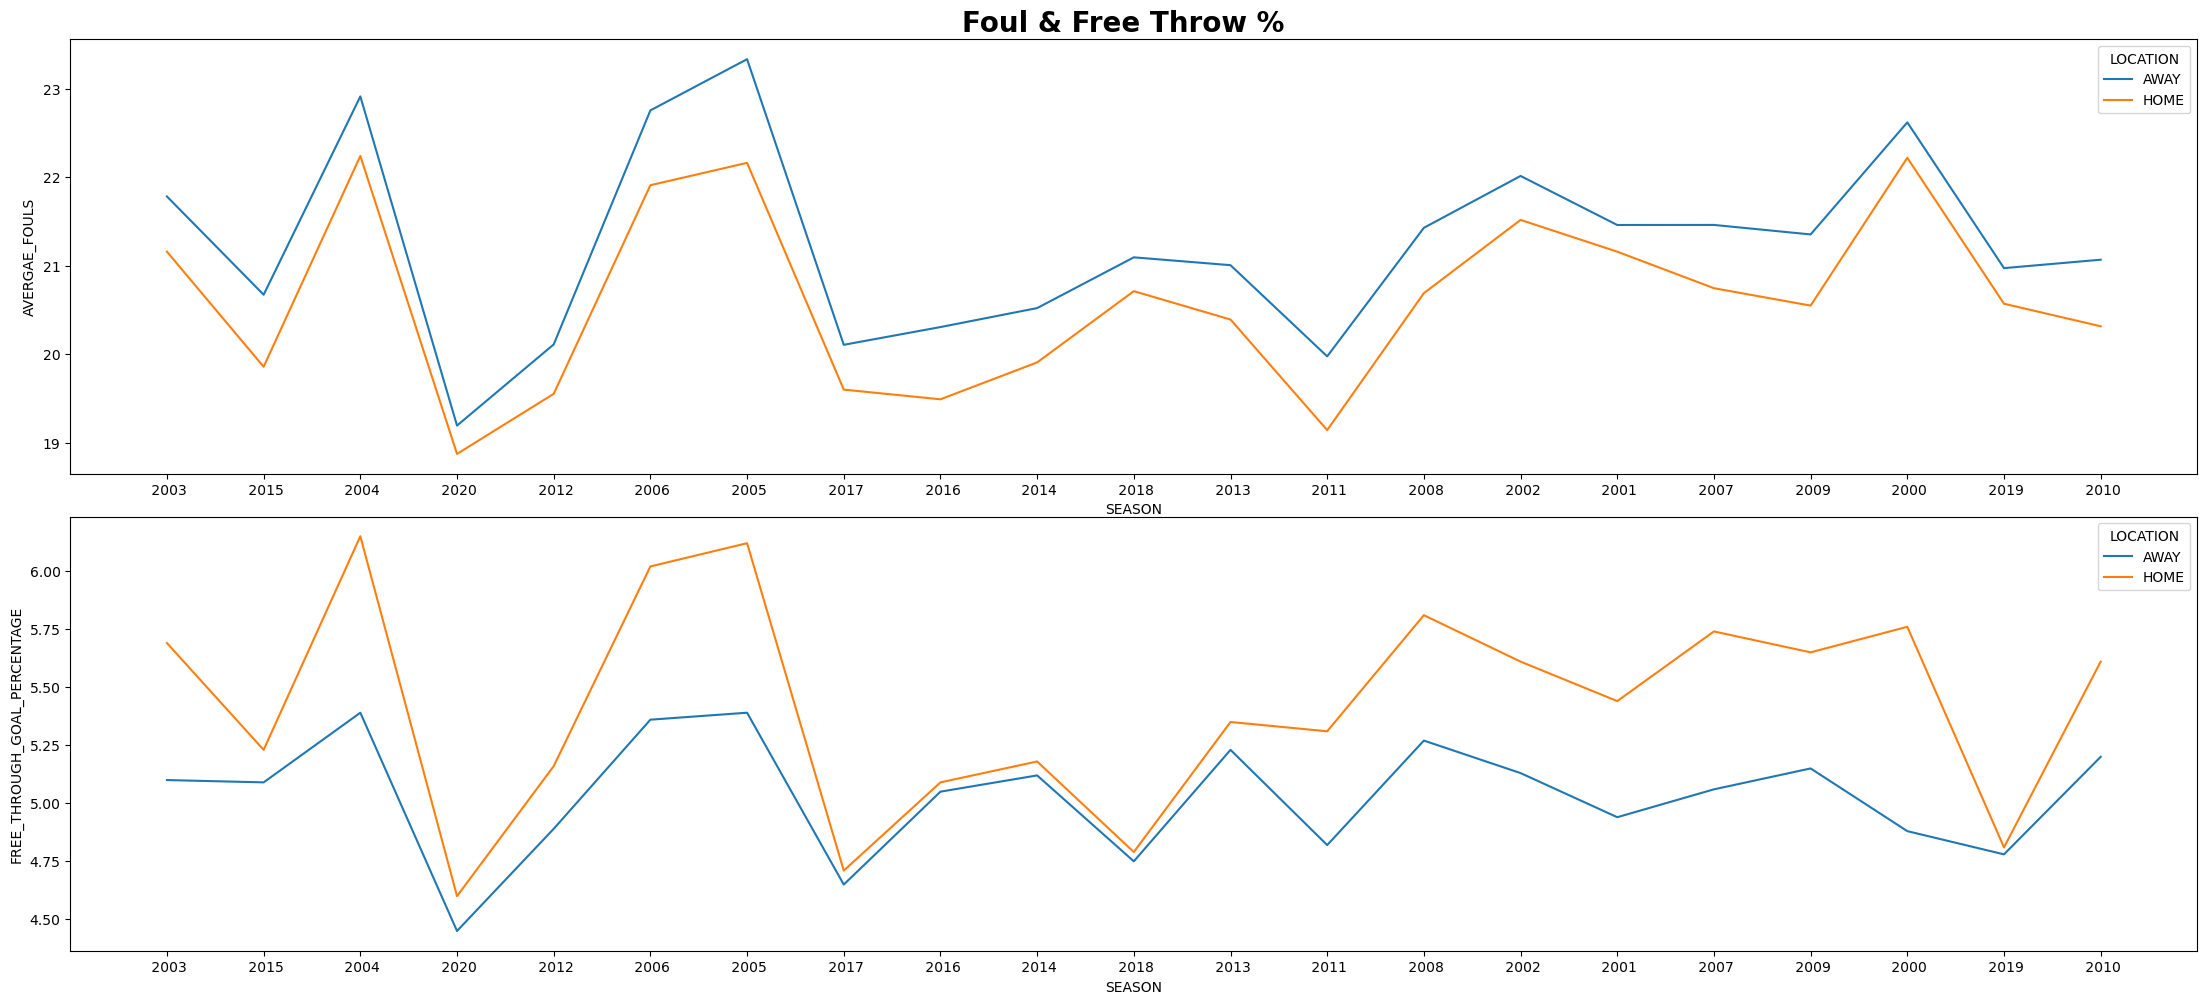

In [174]:
df12 = pd.DataFrame(list(Game_Analysis.aggregate(
[
    {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$LOCATION', '$SEASON' ],
      'AVERGAE_FOULS': { '$avg': '$AVERGAE_FOULS' },
      'FREE_THROUGH_GOAL_PERCENTAGE': { '$sum': '$FREE_THROUGH_GOAL_PERCENTAGE'}
    }
  }
]
)))
pd.set_option('precision', 2)
df12['_id'] = df12['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df12['_id'] = df12['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df12['_id'] = df12['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df12[['LOCATION','SEASON']] = df12['_id'].str.split(',', expand=True)
df12.drop(['_id'],axis=1,inplace=True)
print(df12.head())

fig, axes = plt.subplots(2, 1, figsize=(22,10), sharey=False, sharex=False)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.suptitle('Foul & Free Throw %', fontsize=20, fontweight='bold')
sns.lineplot(ax=axes[0], data=df12, x="SEASON", y="AVERGAE_FOULS", hue = 'LOCATION')
sns.lineplot(ax=axes[1], data=df12, x="SEASON", y="FREE_THROUGH_GOAL_PERCENTAGE", hue = 'LOCATION')

13. 
-- 3 point average percentage and efficiency
-- Average 3 Point Goal Percentage of Top 5 Teams
SELECT 
	`game_analysis`.`SEASON` AS `SEASON`,
	`game_analysis`.`TEAM_NAME` AS `TEAM_NAME`,
	AVG(`game_analysis`.`TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE`) AS `TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE`
FROM 
	`game_analysis`
	INNER JOIN 
    (
	SELECT 
		`game_analysis`.`TEAM_NAME` AS `TEAM_NAME`,
		SUM(WIN_COUNT)*100/SUM(GAME_COUNT) AS `$__alias__0`
	FROM 
		`game_analysis`
	WHERE (`game_analysis`.`SEASON` >= '2000')
	GROUP BY 1
	ORDER BY `$__alias__0` DESC,`TEAM_NAME` ASC
	LIMIT 5
	) `t0` 
    ON (`game_analysis`.`TEAM_NAME` <=> `t0`.`TEAM_NAME`)
WHERE (`game_analysis`.`SEASON` >= '2000')
GROUP BY 1,2;


In [249]:
import numpy as np
topteams = pd.DataFrame(list(Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_NAME'],
      'WIN_COUNT': { '$sum': '$WIN_COUNT' },
      'GAME_COUNT': { '$sum': '$GAME_COUNT' }
    }
  },
  {
    '$set': {
      'win_percentage': {'$multiply':[{'$divide': ['$WIN_COUNT', '$GAME_COUNT']}, 100] }
    }
  },
  { '$sort' : {'win_percentage':-1, 'TEAM_name':1} },
  { '$limit' : 5 }
]
)))
topteams['_id'] = topteams['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
topteams['_id'] = topteams['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
topteams['_id'] = topteams['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
topteams[['TEAM_NAME']] = topteams['_id']
topteams.drop(['_id'],axis=1,inplace=True)
topteams.drop(['WIN_COUNT'],axis=1,inplace=True)
topteams.drop(['GAME_COUNT'],axis=1,inplace=True)
topteams.drop(['win_percentage'],axis=1,inplace=True)
print(topteams.head())
topteams = topteams['TEAM_NAME'].values.tolist()
print(topteams)
x = Game_Analysis.aggregate(
[
    {"$match" : { "TEAM_NAME" : { "$in" : topteams } }
#       ['San Antonio Spurs','Dallas Mavericks','Oklahoma City Thunder','Houston Rockets','Boston Celtics']
    },
    {
    '$group': {
      '_id': ['$TEAM_NAME', '$SEASON'],
      'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': { '$avg': '$TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE'}
    }
    },
  { '$sort' : {'TEAM_NAME':1, 'SEASON':1} }
]) 

CNT = 0
for i in x:
    CNT+= 1
    print(i)
print(CNT)

               TEAM_NAME
0      San Antonio Spurs
1       Dallas Mavericks
2  Oklahoma City Thunder
3        Houston Rockets
4         Boston Celtics
['San Antonio Spurs', 'Dallas Mavericks', 'Oklahoma City Thunder', 'Houston Rockets', 'Boston Celtics']
{'_id': ['San Antonio Spurs', 1985], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.0}
{'_id': ['Boston Celtics', 1962], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': None}
{'_id': ['Houston Rockets', 1997], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.07}
{'_id': ['Boston Celtics', 1952], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': None}
{'_id': ['Dallas Mavericks', 1985], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.01}
{'_id': ['Dallas Mavericks', 2020], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.12}
{'_id': ['Houston Rockets', 2011], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.07}
{'_id': ['Boston Celtics', 1957], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': None}
{'_id': ['Dallas Mavericks', 1999], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.07}
{'_id':

     TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE       TEAM_NAME SEASON
0                                      NaN  Boston Celtics   1946
124                                    NaN  Boston Celtics   1947
235                                    NaN  Boston Celtics   1948
132                                    NaN  Boston Celtics   1949
3                                      NaN  Boston Celtics   1950


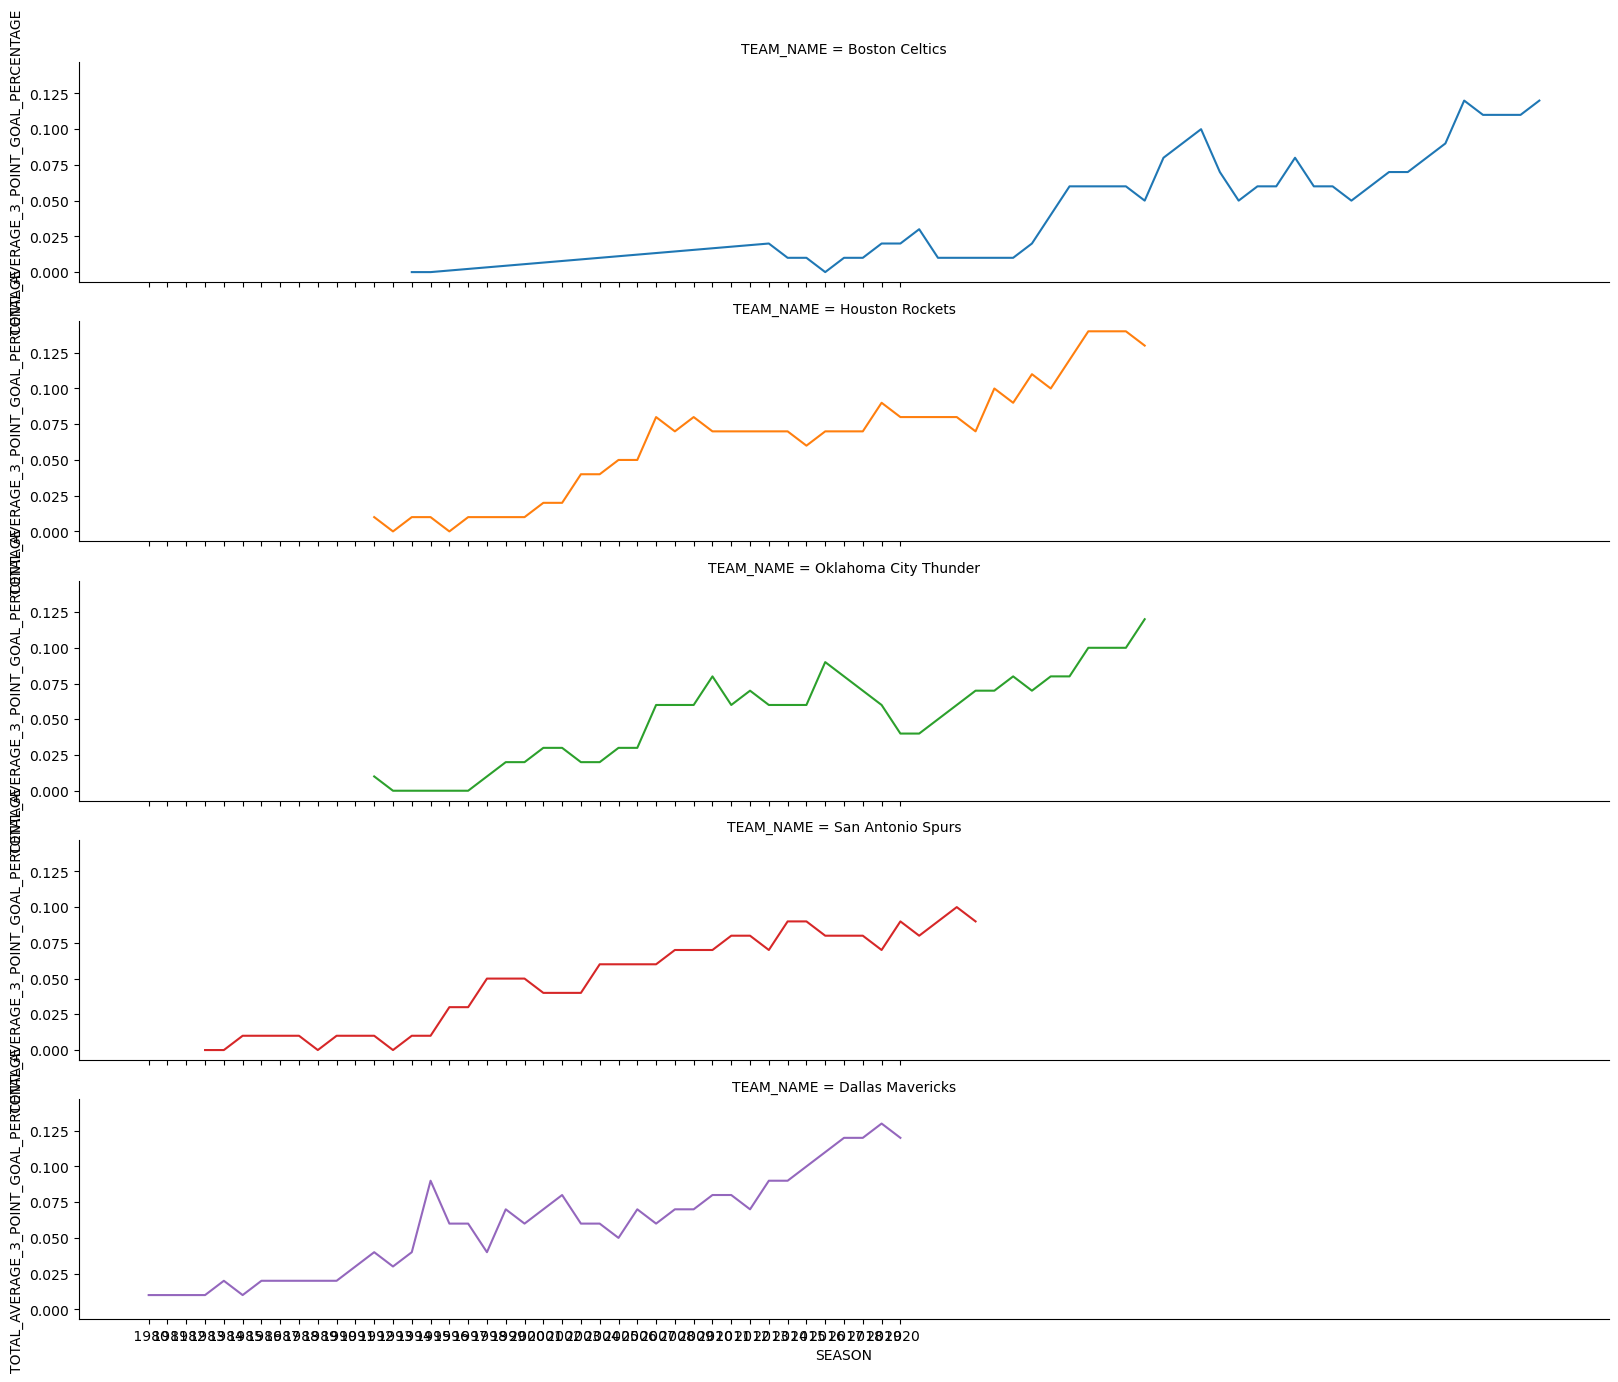

In [276]:
df13 = pd.DataFrame(list(Game_Analysis.aggregate(
[
    {"$match" : { "TEAM_NAME" : { "$in" : topteams } }
#       ['San Antonio Spurs','Dallas Mavericks','Oklahoma City Thunder','Houston Rockets','Boston Celtics']
    },
    {
    '$group': {
      '_id': ['$TEAM_NAME', '$SEASON'],
      'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': { '$avg': '$TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE'}
    }
    },
  { '$sort' : {'TEAM_NAME':1, 'SEASON':1} }
])))
pd.set_option('precision', 2)
df13['_id'] = df13['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df13['_id'] = df13['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df13['_id'] = df13['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df13[['TEAM_NAME','SEASON']] = df13['_id'].str.split(',', expand=True)
df13.drop(['_id'],axis=1,inplace=True)
df13 = df13.sort_values('SEASON')
print(df13.head())
g = sns.FacetGrid(df13, hue="TEAM_NAME", row="TEAM_NAME", height=2.7, aspect=6)
g.map(sns.lineplot, "SEASON", "TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE" )

14. 
-- 3 point average percentage and efficiency
-- Average 3 Point Goal Percentage of Bottom 5 Teams
SELECT 
	`game_analysis`.`SEASON` AS `SEASON`,
	`game_analysis`.`TEAM_NAME` AS `TEAM_NAME`,
	AVG(`game_analysis`.`TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE`) AS `TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE`
FROM 
	`game_analysis`
	INNER JOIN 
    (
	SELECT 
		`game_analysis`.`TEAM_NAME` AS `TEAM_NAME`,
		SUM(WIN_COUNT)*100/SUM(GAME_COUNT) AS `$__alias__0`
	FROM 
		`game_analysis`
	WHERE (`game_analysis`.`SEASON` >= '2000')
	GROUP BY 1
	ORDER BY `$__alias__0` ASC,`TEAM_NAME` ASC
	LIMIT 5
	) `t0` 
    ON (`game_analysis`.`TEAM_NAME` <=> `t0`.`TEAM_NAME`)
WHERE (`game_analysis`.`SEASON` >= '2000')
GROUP BY 1,2;

In [277]:
import numpy as np
bottomteams = pd.DataFrame(list(Game_Analysis.aggregate(
[
  {"$match" : {'SEASON' : {'$gte': 2000}}
  },
    {
    '$group': {
      '_id': ['$TEAM_NAME'],
      'WIN_COUNT': { '$sum': '$WIN_COUNT' },
      'GAME_COUNT': { '$sum': '$GAME_COUNT' }
    }
  },
  {
    '$set': {
      'win_percentage': {'$multiply':[{'$divide': ['$WIN_COUNT', '$GAME_COUNT']}, 100] }
    }
  },
  { '$sort' : {'win_percentage':1, 'TEAM_name':1} },
  { '$limit' : 5 }
]
)))
bottomteams['_id'] = bottomteams['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
bottomteams['_id'] = bottomteams['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
bottomteams['_id'] = bottomteams['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
bottomteams[['TEAM_NAME']] = bottomteams['_id']
bottomteams.drop(['_id'],axis=1,inplace=True)
bottomteams.drop(['WIN_COUNT'],axis=1,inplace=True)
bottomteams.drop(['GAME_COUNT'],axis=1,inplace=True)
bottomteams.drop(['win_percentage'],axis=1,inplace=True)
print(bottomteams.head())
bottomteams = bottomteams['TEAM_NAME'].values.tolist()
print(bottomteams)
x = Game_Analysis.aggregate(
[
    {"$match" : { "TEAM_NAME" : { "$in" : bottomteams } }
#       ['San Antonio Spurs','Dallas Mavericks','Oklahoma City Thunder','Houston Rockets','Boston Celtics']
    },
    {
    '$group': {
      '_id': ['$TEAM_NAME', '$SEASON'],
      'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': { '$avg': '$TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE'}
    }
    },
  { '$sort' : {'TEAM_NAME':1, 'SEASON':1} }
]) 

CNT = 0
for i in x:
    CNT+= 1
    print(i)
print(CNT)

                TEAM_NAME
0         New York Knicks
1  Minnesota Timberwolves
2       Charlotte Hornets
3      Washington Wizards
4        Sacramento Kings
['New York Knicks', 'Minnesota Timberwolves', 'Charlotte Hornets', 'Washington Wizards', 'Sacramento Kings']
{'_id': ['Washington Wizards', 1966], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': None}
{'_id': ['Sacramento Kings', 1952], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': None}
{'_id': ['New York Knicks', 2020], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.11}
{'_id': ['Sacramento Kings', 1949], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': None}
{'_id': ['Washington Wizards', 2003], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.06}
{'_id': ['Sacramento Kings', 1993], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.03}
{'_id': ['Washington Wizards', 1963], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': None}
{'_id': ['Minnesota Timberwolves', 2015], 'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': 0.06}
{'_id': ['Minnesota Timberwolves', 1999], 'TOTAL_AVERAGE_3_P

     TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE         TEAM_NAME SEASON
192                                    NaN   New York Knicks   1946
71                                     NaN   New York Knicks   1947
166                                    NaN  Sacramento Kings   1948
94                                     NaN   New York Knicks   1948
270                                    NaN  Sacramento Kings   1949


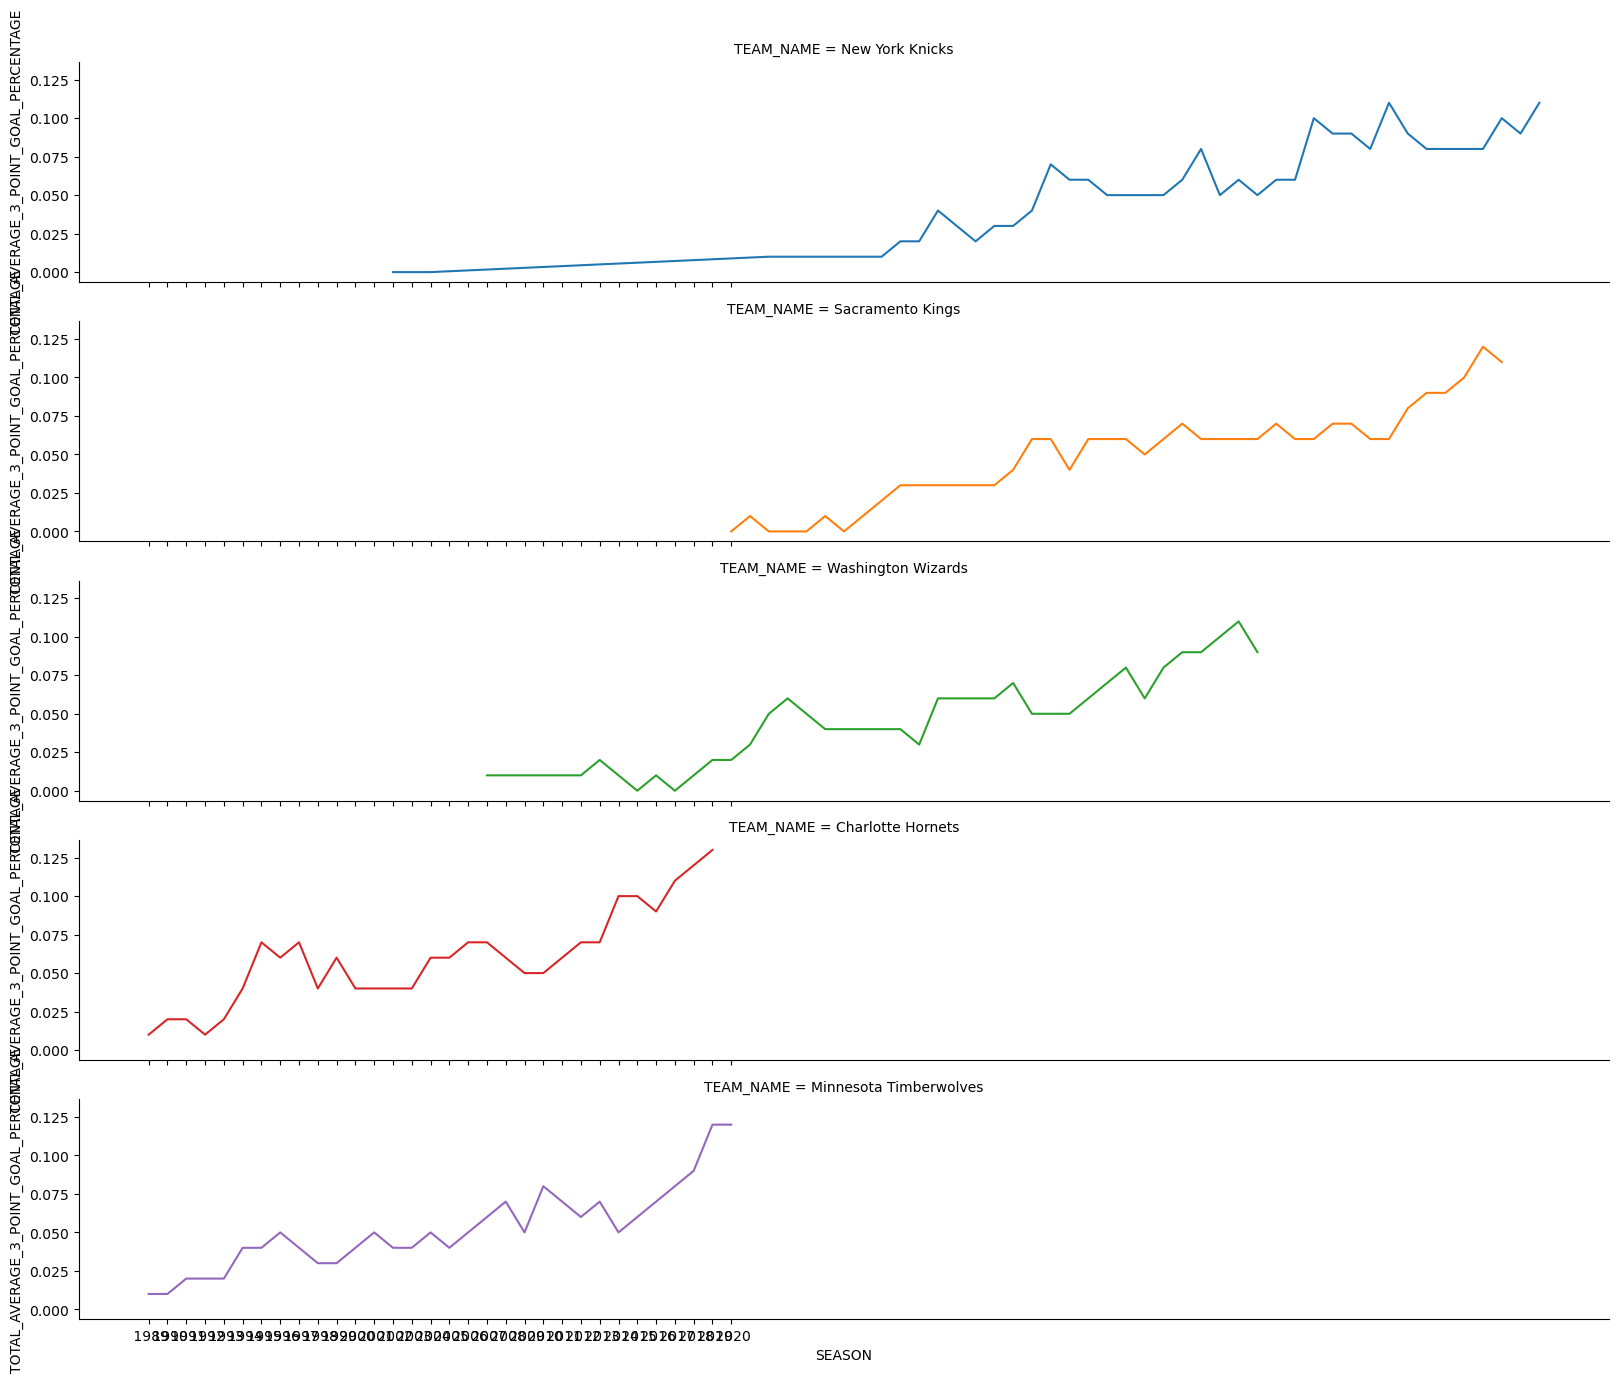

In [281]:
df14 = pd.DataFrame(list(Game_Analysis.aggregate(
[
    {"$match" : { "TEAM_NAME" : { "$in" : bottomteams } }
#       ['San Antonio Spurs','Dallas Mavericks','Oklahoma City Thunder','Houston Rockets','Boston Celtics']
    },
    {
    '$group': {
      '_id': ['$TEAM_NAME', '$SEASON'],
      'TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE': { '$avg': '$TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE'}
    }
    },
  { '$sort' : {'TEAM_NAME':1, 'SEASON':1} }
])))
pd.set_option('precision', 2)
df14['_id'] = df14['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df14['_id'] = df14['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df14['_id'] = df14['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df14[['TEAM_NAME','SEASON']] = df14['_id'].str.split(',', expand=True)
df14.drop(['_id'],axis=1,inplace=True)
df14 = df14.sort_values('SEASON')
print(df14.head())
g = sns.FacetGrid(df14, hue="TEAM_NAME", row="TEAM_NAME", height=2.7, aspect=6)
g.map(sns.lineplot, "SEASON", "TOTAL_AVERAGE_3_POINT_GOAL_PERCENTAGE" )

15. 
-- PLAYER ANALYSIS
-- Player Salary Contract Type Distribution
SELECT 
	`player_stats_with_salary`.`2021 - 2022 CONTRACT TYPE` AS `2021 - 2022 CONTRACT TYPE`,
	COUNT(DISTINCT `player_stats_with_salary`.`PLAYER_ID`) AS `COUNT_OF_PLAYERS`
FROM 
	`player_stats_with_salary`
	INNER JOIN 
	`team_winning_stats_with_salary` 
    ON (`player_stats_with_salary`.`TEAM_ID` = `team_winning_stats_with_salary`.`TEAM_ID`)
WHERE 
	(
    (NOT ISNULL(`player_stats_with_salary`.`2021 - 2022 SALARY`)) 
    AND 
    (`team_winning_stats_with_salary`.`TEAM_NAME` >= 'Atlanta Hawks') 
    AND 
    (`team_winning_stats_with_salary`.`TEAM_NAME` <= 'Washington Wizards')
    )
GROUP BY 1;


In [282]:
x = Player_Analysis.aggregate(
[
    {"$match" : {'2021 - 2022 SALARY' : {'$ne':'null'}}
  },
    {
        "$group": {
            "_id": "$2021 - 2022 CONTRACT TYPE",
            "Player_Count": { "$sum": 1 },
            "totalPlayer": { "$addToSet": "$trans.PLAYER_ID" }
        }
    },
    {
        "$project": {
            "Player_Count": 1,
            "totalPlayers": { "$size": "$totalPlayer" }
        }
    }
])
CNT = 0
for i in x:
    CNT+= 1
    print(i)
print(CNT)

{'_id': 'Not With Team', 'Player_Count': 17, 'totalPlayers': 0}
{'_id': 'Guaranteed', 'Player_Count': 158, 'totalPlayers': 0}
{'_id': 'Non-Guaranteed', 'Player_Count': 40, 'totalPlayers': 0}
{'_id': 'Player Option', 'Player_Count': 14, 'totalPlayers': 0}
{'_id': 'Team Option', 'Player_Count': 9, 'totalPlayers': 0}
{'_id': 'Qualifying Offer', 'Player_Count': 38, 'totalPlayers': 0}
{'_id': 'NULL', 'Player_Count': 117, 'totalPlayers': 0}
7


  2021 - 2022 CONTRACT TYPE  Player_Count
0             Player Option            14
1            Non-Guaranteed            40
2                Guaranteed           158
3             Not With Team            17
4                      NULL           117


([<matplotlib.patches.Wedge at 0x7f87e4829850>,
 [Text(1.0931185485407742, 0.12284884548139313, 'Player Option'),
  Text(0.9414468798274163, 0.5689268603812117, 'Non-Guaranteed'),
  Text(-0.5801743936998179, 0.9345574743669053, 'Guaranteed'),
  Text(-1.0200120134008075, -0.41179544985105315, 'Not With Team'),
  Text(-0.1272170435238358, -1.092618791636431, 'NULL'),
  Text(0.991610104828578, -0.4761401054331137, 'Qualifying Offer'),
  Text(1.097154386681754, -0.07907118176038899, 'Team Option')],
 [Text(0.5962464810222404, 0.06700846117166898, '4%'),
  Text(0.5135164799058634, 0.3103237420261154, '10%'),
  Text(-0.31645876019990066, 0.5097586223819482, '40%'),
  Text(-0.5563701891277131, -0.22461569991875627, '4%'),
  Text(-0.06939111464936497, -0.5959738863471441, '30%'),
  Text(0.5408782389974062, -0.25971278478169835, '10%'),
  Text(0.5984478472809567, -0.04312973550566672, '2%')])

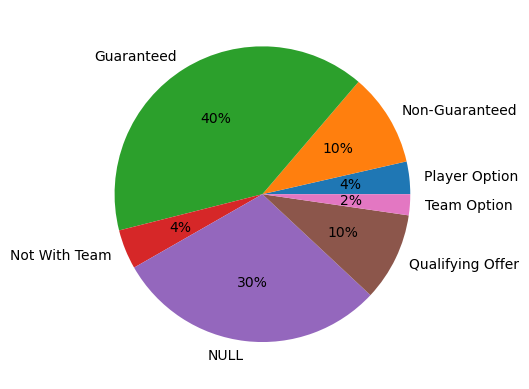

In [284]:
df15 = pd.DataFrame(list(Player_Analysis.aggregate(
[
    {"$match" : {'2021 - 2022 SALARY' : {'$ne':'null'}}
  },
    {
        "$group": {
            "_id": "$2021 - 2022 CONTRACT TYPE",
            "Player_Count": { "$sum": 1 },
            "totalPlayer": { "$addToSet": "$trans.PLAYER_ID" }
        }
    },
    {
        "$project": {
            "Player_Count": 1,
            "totalPlayers": { "$size": "$totalPlayer" }
        }
    }
])))
pd.set_option('precision', 2)
df15['_id'] = df15['_id'].apply(lambda x: str(x).replace('[', '') if '[' in str(x) else str(x))
df15['_id'] = df15['_id'].apply(lambda x: str(x).replace(']', '') if ']' in str(x) else str(x))
df15['_id'] = df15['_id'].apply(lambda x: str(x).replace("'", '') if "'" in str(x) else str(x))
df15[['2021 - 2022 CONTRACT TYPE']] = df15['_id']
df15.drop(['_id'],axis=1,inplace=True)
df15.drop(['totalPlayers'],axis=1,inplace=True)
cols = df15.columns.tolist()
cols = cols[-1:] + cols[:-1]
df15 = df15[cols]
print(df15.head())
plt.pie(df15['Player_Count'], labels = df15['2021 - 2022 CONTRACT TYPE'], autopct='%.0f%%')